In [1]:

import pandas as pd
from pathlib import Path
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.metrics import classification_report
from matplotlib.dates import DateFormatter
warnings.filterwarnings("ignore")


In [2]:
number_bucket = 50
symbol = "VN30"

In [3]:

if Path("Users").exists():  # Windows
    input_path = r"C:\Users\phamhoa\Downloads\thesis\data\Binance\agg\500\VPIN"
    file_path = rf"{input_path}\{symbol}.csv"
else:  # Macbook
    input_path = "/Users/hoapham/Documents/Learning/thesis/data/Binance/agg/500/VPIN"
    file_path = f"{input_path}/{symbol}_{number_bucket}.csv"

data = pd.read_csv(file_path, parse_dates=['Time'])

data = data.drop(columns=["Unnamed: 0"], errors='ignore')
data.drop("KyleLambda", axis=1, inplace=True, errors='ignore')

In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import os

# # ===========================
# # 0. Chuẩn bị dữ liệu
# # ===========================
# df = data.dropna().copy()

# # Time như "2025-11-20 14:20:08+07:00" --> ĐÃ LÀ GIỜ VIỆT NAM
# # => chỉ cần parse, KHÔNG convert
# # df["Time"] = pd.to_datetime(df["Time"], utc=False)

# # Sắp xếp theo thời gian và set index
# df = df.sort_values("Time").set_index("Time")

# # ===========================
# # 1. Tạo thư mục lưu ảnh
# # ===========================
# output_dir = "charts_by_day"
# os.makedirs(output_dir, exist_ok=True)

# # ===========================
# # 2. Hàm vẽ 1 ngày và LƯU FILE
# # ===========================
# def plot_one_day(df_day, date_str, save_path):
#     df_day = df_day.sort_index()

#     fig, ax_price = plt.subplots(figsize=(14, 5))

#     ax_price.plot(df_day.index, df_day["Price"],
#                   color="navy", linewidth=1.8, label="Price")
#     ax_price.set_ylabel("Price", color="navy")
#     ax_price.tick_params(axis="y", labelcolor="navy")
#     ax_price.grid(True, linestyle="--", alpha=0.3)

#     # VPIN + CDF
#     ax_vpin = ax_price.twinx()
#     ax_vpin.plot(df_day.index, df_day["VPIN"],
#                  color="green", linewidth=1.5, label="VPIN")
#     ax_vpin.plot(df_day.index, df_day["CDF"],
#                  color="red", linestyle="--", linewidth=1.5, label="CDF(VPIN)")

#     ax_vpin.set_ylabel("VPIN / CDF(VPIN)")

#     # VPIN scaling
#     vpmax = df_day["VPIN"].max()
#     vpmin = df_day["VPIN"].min()
#     eps = (vpmax - vpmin) * 0.2
#     if eps == 0:
#         eps = max(vpmax, 1e-6) * 0.1
#     ax_vpin.set_ylim(min(0, vpmin - eps), max(1, vpmax + eps))

#     # Format giờ -> đúng giờ VN 9–11, 13–15
#     ax_price.xaxis.set_major_formatter(DateFormatter("%H:%M", tz=df_day.index.tz))
#     plt.setp(ax_price.get_xticklabels(), rotation=30, ha="right")

#     # Legend
#     lines1, labels1 = ax_price.get_legend_handles_labels()
#     lines2, labels2 = ax_vpin.get_legend_handles_labels()
#     ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

#     ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")
#     plt.tight_layout()

#     plt.savefig(save_path, dpi=200)
#     plt.close()

# # ===========================
# # 3. Loop theo từng ngày LOCAL — LƯU FILE
# # ===========================
# for day, df_day in df.groupby(df.index.date):
#     date_str = day.strftime("%Y-%m-%d")
#     save_path = os.path.join(output_dir, f"{date_str}.png")

#     print(f"Lưu biểu đồ: {save_path}")
#     plot_one_day(df_day, date_str, save_path)

# print("🎉 Hoàn tất! Tất cả hình đã được lưu vào thư mục:", output_dir)


In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import os

# # ===========================
# # 0. Chuẩn bị dữ liệu
# # ===========================
# # Giả sử biến gốc là `data` và có cột "Time", "Price", "VPIN", "CDF"
# df = data.dropna().copy()

# # Time như "2025-11-20 14:20:08+07:00" --> ĐÃ LÀ GIỜ VIỆT NAM
# # => chỉ cần sort + set index, không convert
# # df["Time"] = pd.to_datetime(df["Time"], utc=False)

# df = df.sort_values("Time").set_index("Time")

# # ===========================
# # 1. Tạo thư mục lưu ảnh
# # ===========================
# output_dir = "charts_by_day"
# os.makedirs(output_dir, exist_ok=True)

# # ===========================
# # 2. Hàm vẽ 1 ngày và LƯU FILE
# # ===========================
# def plot_one_day(df_day, date_str, save_path):
#     df_day = df_day.sort_index()

#     # Nếu ngày đó không có dữ liệu thì bỏ
#     if df_day.empty:
#         return

#     fig, ax_price = plt.subplots(figsize=(14, 5))
#     ax_vpin = ax_price.twinx()

#     # ==== 2 phiên: sáng 9–11, chiều 13–15 ====
#     sessions = [
#         ("09:00", "11:00"),  # sáng
#         ("13:00", "15:00"),  # chiều
#     ]

#     price_labeled = False
#     vpin_labeled = False
#     cdf_labeled = False

#     for start_t, end_t in sessions:
#         # Lọc dữ liệu theo khung giờ trong ngày
#         df_sess = df_day.between_time(start_t, end_t)

#         if df_sess.empty:
#             continue

#         # Price
#         ax_price.plot(
#             df_sess.index,
#             df_sess["Price"],
#             color="navy",
#             linewidth=1.8,
#             label="Price" if not price_labeled else None,
#         )
#         price_labeled = True

#         # VPIN
#         ax_vpin.plot(
#             df_sess.index,
#             df_sess["VPIN"],
#             color="green",
#             linewidth=1.5,
#             label="VPIN" if not vpin_labeled else None,
#         )
#         vpin_labeled = True

#         # CDF(VPIN)
#         ax_vpin.plot(
#             df_sess.index,
#             df_sess["CDF"],
#             color="red",
#             linestyle="--",
#             linewidth=1.5,
#             label="CDF(VPIN)" if not cdf_labeled else None,
#         )
#         cdf_labeled = True

#     # Nếu cả ngày không có phiên nào có dữ liệu thì thôi
#     if not price_labeled:
#         plt.close(fig)
#         return

#     # Label trục + grid
#     ax_price.set_ylabel("Price", color="navy")
#     ax_price.tick_params(axis="y", labelcolor="navy")
#     ax_price.grid(True, linestyle="--", alpha=0.3)

#     ax_vpin.set_ylabel("VPIN / CDF(VPIN)")

#     # VPIN scaling dựa trên cả ngày
#     vpmax = df_day["VPIN"].max()
#     vpmin = df_day["VPIN"].min()
#     eps = (vpmax - vpmin) * 0.2
#     if eps == 0:
#         eps = max(vpmax, 1e-6) * 0.1
#     ax_vpin.set_ylim(min(0, vpmin - eps), max(1, vpmax + eps))

#     # Format giờ -> đúng giờ VN, không nối qua buổi trưa vì ta không vẽ đoạn 11–13
#     ax_price.xaxis.set_major_formatter(
#         mdates.DateFormatter("%H:%M", tz=df_day.index.tz)
#     )
#     plt.setp(ax_price.get_xticklabels(), rotation=30, ha="right")

#     # Legend
#     lines1, labels1 = ax_price.get_legend_handles_labels()
#     lines2, labels2 = ax_vpin.get_legend_handles_labels()
#     ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

#     ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")
#     plt.tight_layout()

#     plt.savefig(save_path, dpi=200)
#     plt.close(fig)

# # ===========================
# # 3. Loop theo từng ngày LOCAL — LƯU FILE
# # ===========================
# for day, df_day in df.groupby(df.index.date):
#     date_str = day.strftime("%Y-%m-%d")
#     save_path = os.path.join(output_dir, f"{date_str}.png")

#     print(f"Lưu biểu đồ: {save_path}")
#     plot_one_day(df_day, date_str, save_path)

# print("🎉 Hoàn tất! Tất cả hình đã được lưu vào thư mục:", output_dir)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # vẫn import nếu sau này cần
import os

# ===========================
# 0. Chuẩn bị dữ liệu
# ===========================
# Giả sử biến gốc là `data` và có cột: Time, Price, VPIN, CDF
df = data.dropna().copy()

# Time đã là giờ VN --> chỉ cần sort + set index
# df["Time"] = pd.to_datetime(df["Time"], utc=False)
df = df.sort_values("Time").set_index("Time")

# ===========================
# 1. Tạo thư mục lưu ảnh
# ===========================
output_dir = "charts_by_day"
os.makedirs(output_dir, exist_ok=True)

# ===========================
# 2. Hàm vẽ 1 ngày và LƯU FILE
# ===========================
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()

    if df_day.empty:
        return

    # ==== Tạo mask phiên sáng / chiều ====
    t9  = pd.to_datetime("09:00").time()
    t11 = pd.to_datetime("11:00").time()
    t13 = pd.to_datetime("13:00").time()
    t15 = pd.to_datetime("15:00").time()

    times = df_day.index.time

    mask_morning = (times >= t9) & (times < t11)
    mask_afternoon = (times >= t13) & (times < t15)

    # Chỉ giữ các điểm trong giờ giao dịch (bỏ hẳn 11–13)
    df_trade = df_day[mask_morning | mask_afternoon].copy()
    if df_trade.empty:
        return

    # ==== Tạo trục thời gian "nén" lại (chỉ gồm các điểm giao dịch) ====
    df_trade["new_index"] = range(len(df_trade))
    # mapping từ time thật -> index mới
    time_to_new = dict(zip(df_trade.index, df_trade["new_index"]))
    # set index sang trục mới, liên tục 0..N-1
    df_trade = df_trade.set_index("new_index")

    # ===========================
    # Bắt đầu vẽ
    # ===========================
    fig, ax_price = plt.subplots(figsize=(14, 5))
    ax_vpin = ax_price.twinx()

    # Price
    ax_price.plot(
        df_trade.index,
        df_trade["Price"],
        linewidth=1.8,
        label="Price",
        color="navy",
    )

    # VPIN + CDF
    ax_vpin.plot(
        df_trade.index,
        df_trade["VPIN"],
        linewidth=1.5,
        label="VPIN",
        color="green",
    )
    ax_vpin.plot(
        df_trade.index,
        df_trade["CDF"],
        linewidth=1.5,
        linestyle="--",
        label="CDF(VPIN)",
        color="red",
    )

    # ==== Tạo tick cho trục X theo giờ phiên, nhưng trên trục "nén" ====
    xticks = []
    xtick_labels = []
    sessions = [("09:00", "11:00"), ("13:00", "15:00")]

    for start_t_str, end_t_str in sessions:
        df_sess = df_day.between_time(start_t_str, end_t_str)
        if df_sess.empty:
            continue

        sess_times = df_sess.index

        # Lọc chỉ những timestamp có trong df_trade (tức là trong giờ giao dịch)
        sess_times = [t for t in sess_times if t in time_to_new]
        if not sess_times:
            continue

        first_time = sess_times[0]
        last_time = sess_times[-1]

        start_new = time_to_new[first_time]
        end_new = time_to_new[last_time]

        xticks.extend([start_new, end_new])
        xtick_labels.extend([start_t_str, end_t_str])

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, rotation=30, ha="right")

    # ===========================
    # Trang trí trục, legend, title
    # ===========================
    ax_price.set_ylabel("Price", color="navy")
    ax_price.tick_params(axis="y", labelcolor="navy")
    ax_price.grid(True, linestyle="--", alpha=0.3)

    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")

    # VPIN scaling theo dữ liệu giao dịch
    vpmax = df_trade["VPIN"].max()
    vpmin = df_trade["VPIN"].min()
    eps = (vpmax - vpmin) * 0.2
    if eps == 0:
        eps = max(vpmax, 1e-6) * 0.1
    ax_vpin.set_ylim(min(0, vpmin - eps), max(1, vpmax + eps))

    ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")

    # Legend chung
    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)

# ===========================
# 3. Loop theo từng ngày LOCAL — LƯU FILE
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")

    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào thư mục:", output_dir)


Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ===========================
# 0. Chuẩn bị dữ liệu
# ===========================
# Giả sử biến gốc là `data` và có cột: Time, Price, VPIN, CDF
df = data.dropna().copy()

# Time đã là giờ VN --> chỉ cần sort + set index
# df["Time"] = pd.to_datetime(df["Time"], utc=False)
df = df.sort_values("Time").set_index("Time")

# ===========================
# 1. Tạo thư mục lưu ảnh
# ===========================
output_dir = "charts_by_day"
os.makedirs(output_dir, exist_ok=True)

# ===========================
# 2. Hàm vẽ 1 ngày và LƯU FILE
# ===========================
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()

    if df_day.empty:
        return

    # ==== Giờ phiên ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Phiên sáng 09:00–11:30, chiều 13:00–15:00
    mask_morning   = (times >= t9) & (times < t1130)
    mask_afternoon = (times >= t13) & (times < t15)

    # Chỉ giữ các điểm trong giờ giao dịch (bỏ hẳn 11:30–13:00)
    df_trade = df_day[mask_morning | mask_afternoon].copy()
    if df_trade.empty:
        return

    # ==== Tạo trục thời gian "nén" lại (chỉ gồm các điểm giao dịch) ====
    df_trade["new_index"] = range(len(df_trade))
    time_to_new = dict(zip(df_trade.index, df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index")

    # ===========================
    # Bắt đầu vẽ
    # ===========================
    fig, ax_price = plt.subplots(figsize=(14, 5))
    ax_vpin = ax_price.twinx()

    # Price
    ax_price.plot(
        df_trade.index,
        df_trade["Price"],
        linewidth=1.8,
        label="Price",
        color="navy",
    )

    # VPIN + CDF
    ax_vpin.plot(
        df_trade.index,
        df_trade["VPIN"],
        linewidth=1.5,
        label="VPIN",
        color="green",
    )
    ax_vpin.plot(
        df_trade.index,
        df_trade["CDF"],
        linewidth=1.5,
        linestyle="--",
        label="CDF(VPIN)",
        color="red",
    )

    # ===========================
    # Tạo tick X "nén" nhưng label theo giờ
    # ===========================
    xticks = []
    xtick_labels = []

    # Lấy info phiên sáng
    morning_info = None
    df_morning = df_day.between_time("09:00", "11:30")
    if not df_morning.empty:
        sess_times = [t for t in df_morning.index if t in time_to_new]
        if sess_times:
            morning_start_new = time_to_new[sess_times[0]]
            morning_end_new   = time_to_new[sess_times[-1]]
            morning_info = (morning_start_new, morning_end_new)

    # Lấy info phiên chiều
    afternoon_info = None
    df_afternoon = df_day.between_time("13:00", "15:00")
    if not df_afternoon.empty:
        sess_times = [t for t in df_afternoon.index if t in time_to_new]
        if sess_times:
            afternoon_start_new = time_to_new[sess_times[0]]
            afternoon_end_new   = time_to_new[sess_times[-1]]
            afternoon_info = (afternoon_start_new, afternoon_end_new)

    # Trường hợp có cả 2 phiên -> vẽ 3 tick: 09:00, 11:30–13:00, 15:00
    if morning_info and afternoon_info:
        morning_start_new, morning_end_new = morning_info
        afternoon_start_new, afternoon_end_new = afternoon_info

        xticks = [
            morning_start_new,       # 09:00
            afternoon_start_new,     # tick chỗ nối 11:30–13:00
            afternoon_end_new        # 15:00
        ]
        xtick_labels = [
            "09:00",
            "11:30–13:00",
            "15:00"
        ]
    else:
        # Chỉ có 1 phiên nào đó
        if morning_info:
            morning_start_new, morning_end_new = morning_info
            xticks = [morning_start_new, morning_end_new]
            xtick_labels = ["09:00", "11:30"]
        elif afternoon_info:
            afternoon_start_new, afternoon_end_new = afternoon_info
            xticks = [afternoon_start_new, afternoon_end_new]
            xtick_labels = ["13:00", "15:00"]

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, rotation=30, ha="right")

    # ===========================
    # Trang trí trục, legend, title
    # ===========================
    ax_price.set_ylabel("Price", color="navy")
    ax_price.tick_params(axis="y", labelcolor="navy")
    ax_price.grid(True, linestyle="--", alpha=0.3)

    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")

    # VPIN scaling theo dữ liệu giao dịch
    vpmax = df_trade["VPIN"].max()
    vpmin = df_trade["VPIN"].min()
    eps = (vpmax - vpmin) * 0.2
    if eps == 0:
        eps = max(vpmax, 1e-6) * 0.1
    ax_vpin.set_ylim(min(0, vpmin - eps), max(1, vpmax + eps))

    ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")

    # Legend chung
    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)

# ===========================
# 3. Loop theo từng ngày LOCAL — LƯU FILE
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")

    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào thư mục:", output_dir)


Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

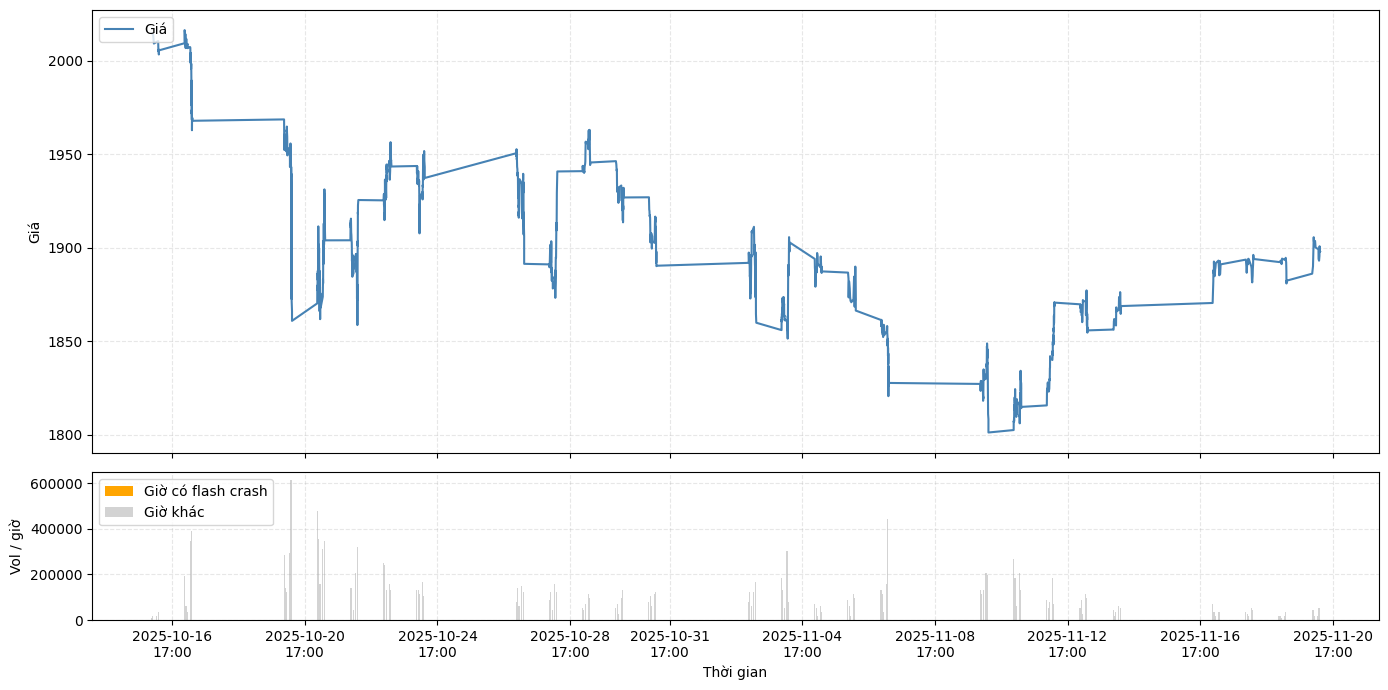

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch

# ===========================
# 0. Chuẩn bị dữ liệu
# ===========================
df = data.copy()

# Time đã là giờ VN dạng string -> parse + set index
df["Time"] = pd.to_datetime(df["Time"], utc=False)
df = df.sort_values("Time").set_index("Time")

# Chỉ giữ những cột cần thiết
df = df[["Price", "Volume"]].dropna()

# ===========================
# 1. Xác định flash crash (theo cửa sổ 5 phút)
# ===========================
flash_window = "5T"          # 5 minutes
flash_drop   = 0.03          # drop >= 3% được coi là flash crash

# Lấy giá cuối mỗi 5 phút
price_5m = df["Price"].resample(flash_window).last()
ret_5m = price_5m.pct_change()

# Những mốc có giảm > 3%
crash_mask = ret_5m <= -flash_drop
crash_times = price_5m.index[crash_mask]

# Tạo list vùng flash crash: (t_start, t_end, t_trough)
flash_regions = []
for t in crash_times:
    # cửa sổ quan sát từ t đến t + 5 phút
    t_start = t
    t_end = t + pd.Timedelta(flash_window)

    df_win = df.loc[t_start:t_end]
    if df_win.empty:
        continue

    # đáy trong cửa sổ
    trough_time = df_win["Price"].idxmin()
    flash_regions.append((t_start, t_end, trough_time))

# ===========================
# 2. Volume theo giờ
# ===========================
vol_hourly = df["Volume"].resample("1H").sum()

# Xác định giờ nào có flash crash để tô màu bar
bar_colors = []
for h in vol_hourly.index:
    h_start = h
    h_end = h + pd.Timedelta(hours=1)
    # nếu có bất kỳ flash crash time nằm trong giờ này
    has_crash = any((t_start >= h_start) and (t_start < h_end)
                    for (t_start, t_end, trough) in flash_regions)
    bar_colors.append("orange" if has_crash else "lightgrey")

# ===========================
# 3. Vẽ biểu đồ
# ===========================
fig, (ax_price, ax_vol) = plt.subplots(
    2, 1, figsize=(14, 7),
    sharex=True,
    gridspec_kw={"height_ratios": [3, 1]}
)

# --- 3.1. Biểu đồ giá + flash crash ---
ax_price.plot(df.index, df["Price"], label="Giá", color="steelblue")

# Tô nền + marker cho từng flash crash
for (t_start, t_end, trough_time) in flash_regions:
    # tô nền
    ax_price.axvspan(t_start, t_end, color="orange", alpha=0.2)

    # điểm bắt đầu (flash start)
    ax_price.scatter(
        t_start,
        df.loc[t_start, "Price"],
        color="red",
        s=40,
        zorder=5,
        label="Điểm bắt đầu rơi (flash start)"
        if "flash_start_labeled" not in locals() else None,
    )
    flash_start_labeled = True

    # đáy
    ax_price.scatter(
        trough_time,
        df.loc[trough_time, "Price"],
        color="purple",
        s=40,
        zorder=5,
        label="Đáy"
        if "trough_labeled" not in locals() else None,
    )
    trough_labeled = True

ax_price.set_ylabel("Giá")
ax_price.grid(True, linestyle="--", alpha=0.3)

# format trục thời gian
ax_price.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M"))
plt.setp(ax_price.get_xticklabels(), rotation=0, ha="center")

ax_price.legend(loc="upper left")

# --- 3.2. Biểu đồ volume theo giờ ---
width = 1/24 * 0.8  # 0.8 giờ (đơn vị là day) để bar không dính nhau
ax_vol.bar(vol_hourly.index, vol_hourly.values,
           width=width, color=bar_colors, edgecolor="none")

ax_vol.set_ylabel("Vol / giờ")

# Legend cho volume
legend_handles = [
    Patch(facecolor="orange", label="Giờ có flash crash"),
    Patch(facecolor="lightgrey", label="Giờ khác"),
]
ax_vol.legend(handles=legend_handles, loc="upper left")

ax_vol.grid(True, linestyle="--", alpha=0.3)

ax_vol.set_xlabel("Thời gian")

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ===========================
# 0. Chuẩn bị dữ liệu
# ===========================
# Giả sử biến gốc là `data` và có cột: Time, Price, VPIN, CDF, Volume
df = data.dropna().copy()

# Time đã là giờ VN --> chỉ cần sort + set index
# df["Time"] = pd.to_datetime(df["Time"], utc=False)
df = df.sort_values("Time").set_index("Time")

# ===========================
# 1. Tạo thư mục lưu ảnh
# ===========================
output_dir = "charts_by_day"
os.makedirs(output_dir, exist_ok=True)

# ===========================
# 2. Hàm vẽ 1 ngày và LƯU FILE
# ===========================
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()

    if df_day.empty:
        return

    # ==== Giờ phiên ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Phiên sáng 09:00–11:30, chiều 13:00–15:00
    mask_morning   = (times >= t9) & (times < t1130)
    mask_afternoon = (times >= t13) & (times < t15)

    # Chỉ giữ các điểm trong giờ giao dịch (bỏ hẳn 11:30–13:00)
    df_trade = df_day[mask_morning | mask_afternoon].copy()
    if df_trade.empty:
        return

    # Lưu lại thời gian gốc
    df_trade["orig_time"] = df_trade.index

    # ==== Tạo trục thời gian "nén" lại (chỉ gồm các điểm giao dịch) ====
    df_trade["new_index"] = range(len(df_trade))
    # mapping: thời gian thật -> index nén
    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index")

    # ===========================
    # Bắt đầu vẽ: 2 hàng (giá+VPIN ở trên, volume ở dưới)
    # ===========================
    fig, (ax_price, ax_vol) = plt.subplots(
        2, 1,
        figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # --------- Price ----------
    ax_price.plot(
        df_trade.index,
        df_trade["Price"],
        linewidth=1.8,
        label="Price",
        color="navy",
    )

    # --------- VPIN + CDF ----------
    ax_vpin.plot(
        df_trade.index,
        df_trade["VPIN"],
        linewidth=1.5,
        label="VPIN",
        color="green",
    )
    ax_vpin.plot(
        df_trade.index,
        df_trade["CDF"],
        linewidth=1.5,
        linestyle="--",
        label="CDF(VPIN)",
        color="red",
    )

    # ===========================
    # Tạo tick X "nén" nhưng label theo giờ
    # ===========================
    xticks = []
    xtick_labels = []

    # Lấy info phiên sáng
    morning_info = None
    df_morning = df_day.between_time("09:00", "11:30")
    if not df_morning.empty:
        sess_times = [t for t in df_morning.index if t in time_to_new]
        if sess_times:
            morning_start_new = time_to_new[sess_times[0]]
            morning_end_new   = time_to_new[sess_times[-1]]
            morning_info = (morning_start_new, morning_end_new)

    # Lấy info phiên chiều
    afternoon_info = None
    df_afternoon = df_day.between_time("13:00", "15:00")
    if not df_afternoon.empty:
        sess_times = [t for t in df_afternoon.index if t in time_to_new]
        if sess_times:
            afternoon_start_new = time_to_new[sess_times[0]]
            afternoon_end_new   = time_to_new[sess_times[-1]]
            afternoon_info = (afternoon_start_new, afternoon_end_new)

    # Trường hợp có cả 2 phiên -> vẽ 3 tick: 09:00, 11:30–13:00, 15:00
    if morning_info and afternoon_info:
        morning_start_new, morning_end_new = morning_info
        afternoon_start_new, afternoon_end_new = afternoon_info

        xticks = [
            morning_start_new,       # 09:00
            afternoon_start_new,     # tick chỗ nối 11:30–13:00
            afternoon_end_new        # 15:00
        ]
        xtick_labels = [
            "09:00",
            "11:30–13:00",
            "15:00"
        ]
    else:
        # Chỉ có 1 phiên nào đó
        if morning_info:
            morning_start_new, morning_end_new = morning_info
            xticks = [morning_start_new, morning_end_new]
            xtick_labels = ["09:00", "11:30"]
        elif afternoon_info:
            afternoon_start_new, afternoon_end_new = afternoon_info
            xticks = [afternoon_start_new, afternoon_end_new]
            xtick_labels = ["13:00", "15:00"]

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, rotation=30, ha="right")

    # ===========================
    # Volume theo giờ (ở trục dưới)
    # ===========================
    # tên cột volume giả sử là "Volume"
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    vol_hour = df_trade.groupby("hour")["Volume"].sum()

    bar_x = []
    bar_w = []
    for h, vol in vol_hour.items():
        idxs = df_trade.loc[df_trade["hour"] == h].index
        if len(idxs) == 0:
            continue
        x_center = (idxs.min() + idxs.max()) / 2.0
        width = (idxs.max() - idxs.min() + 1) * 0.8  # 0.8 để bar không dính nhau
        bar_x.append(x_center)
        bar_w.append(width)

    ax_vol.bar(bar_x, vol_hour.values, width=bar_w, color="lightgrey", edgecolor="none")
    ax_vol.set_ylabel("Volume / giờ")
    ax_vol.grid(True, linestyle="--", alpha=0.3)

    # ===========================
    # Trang trí trục, legend, title
    # ===========================
    ax_price.set_ylabel("Price", color="navy")
    ax_price.tick_params(axis="y", labelcolor="navy")
    ax_price.grid(True, linestyle="--", alpha=0.3)

    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")

    # VPIN scaling theo dữ liệu giao dịch
    vpmax = df_trade["VPIN"].max()
    vpmin = df_trade["VPIN"].min()
    eps = (vpmax - vpmin) * 0.2
    if eps == 0:
        eps = max(vpmax, 1e-6) * 0.1
    ax_vpin.set_ylim(min(0, vpmin - eps), max(1, vpmax + eps))

    ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")

    # Legend chung
    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)

# ===========================
# 3. Loop theo từng ngày LOCAL — LƯU FILE
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")

    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào thư mục:", output_dir)


Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ===========================
# 0. Chuẩn bị dữ liệu
# ===========================
# Giả sử biến gốc là `data` và có cột: Time, Price, VPIN, CDF, Volume
df = data.dropna().copy()

# Time đã là giờ VN --> chỉ cần sort + set index
# df["Time"] = pd.to_datetime(df["Time"], utc=False)
df = df.sort_values("Time").set_index("Time")

# ===========================
# 1. Tạo thư mục lưu ảnh
# ===========================
output_dir = "charts_by_day"
os.makedirs(output_dir, exist_ok=True)

# ===========================
# 2. Hàm vẽ 1 ngày và LƯU FILE
# ===========================
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()

    if df_day.empty:
        return

    # ==== Giờ phiên ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Phiên sáng 09:00–11:30, chiều 13:00–15:00
    mask_morning   = (times >= t9) & (times < t1130)
    mask_afternoon = (times >= t13) & (times < t15)

    # Chỉ giữ các điểm trong giờ giao dịch (bỏ hẳn 11:30–13:00)
    df_trade = df_day[mask_morning | mask_afternoon].copy()
    if df_trade.empty:
        return

    # Lưu lại thời gian gốc
    df_trade["orig_time"] = df_trade.index

    # ==== Tạo trục thời gian "nén" lại (chỉ gồm các điểm giao dịch) ====
    df_trade["new_index"] = range(len(df_trade))
    # mapping: thời gian thật -> index nén
    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index")

    # ===========================
    # Bắt đầu vẽ: 2 hàng (giá+VPIN ở trên, volume ở dưới)
    # ===========================
    fig, (ax_price, ax_vol) = plt.subplots(
        2, 1,
        figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # --------- Price ----------
    ax_price.plot(
        df_trade.index,
        df_trade["Price"],
        linewidth=1.8,
        label="Price",
        color="navy",
    )

    # --------- VPIN + CDF ----------
    ax_vpin.plot(
        df_trade.index,
        df_trade["VPIN"],
        linewidth=1.5,
        label="VPIN",
        color="green",
    )
    ax_vpin.plot(
        df_trade.index,
        df_trade["CDF"],
        linewidth=1.5,
        linestyle="--",
        label="CDF(VPIN)",
        color="red",
    )

    # ===========================
    # Tạo tick X "nén" nhưng label theo giờ
    # ===========================
    xticks = []
    xtick_labels = []

    # Lấy info phiên sáng
    morning_info = None
    df_morning = df_day.between_time("09:00", "11:30")
    if not df_morning.empty:
        sess_times = [t for t in df_morning.index if t in time_to_new]
        if sess_times:
            morning_start_new = time_to_new[sess_times[0]]
            morning_end_new   = time_to_new[sess_times[-1]]
            morning_info = (morning_start_new, morning_end_new)

    # Lấy info phiên chiều
    afternoon_info = None
    df_afternoon = df_day.between_time("13:00", "15:00")
    if not df_afternoon.empty:
        sess_times = [t for t in df_afternoon.index if t in time_to_new]
        if sess_times:
            afternoon_start_new = time_to_new[sess_times[0]]
            afternoon_end_new   = time_to_new[sess_times[-1]]
            afternoon_info = (afternoon_start_new, afternoon_end_new)

    # Trường hợp có cả 2 phiên -> vẽ 3 tick: 09:00, 11:30–13:00, 15:00
    if morning_info and afternoon_info:
        morning_start_new, morning_end_new = morning_info
        afternoon_start_new, afternoon_end_new = afternoon_info

        xticks = [
            morning_start_new,       # 09:00
            afternoon_start_new,     # tick chỗ nối 11:30–13:00
            afternoon_end_new        # 15:00
        ]
        xtick_labels = [
            "09:00",
            "11:30–13:00",
            "15:00"
        ]
    else:
        # Chỉ có 1 phiên nào đó
        if morning_info:
            morning_start_new, morning_end_new = morning_info
            xticks = [morning_start_new, morning_end_new]
            xtick_labels = ["09:00", "11:30"]
        elif afternoon_info:
            afternoon_start_new, afternoon_end_new = afternoon_info
            xticks = [afternoon_start_new, afternoon_end_new]
            xtick_labels = ["13:00", "15:00"]

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, rotation=30, ha="right")

    # ===========================
    # Volume theo giờ (ở trục dưới)
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    vol_hour = df_trade.groupby("hour")["Volume"].sum()

    # Lấy vị trí trung tâm mỗi giờ trên timeline nén
    bar_x = []
    for h in vol_hour.index:
        idxs = df_trade.loc[df_trade["hour"] == h].index
        if len(idxs) == 0:
            continue
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    # Bar width cố định → đẹp và đều
    bar_w = 20

    # Xác định vị trí volume lớn nhất
    max_vol_idx = vol_hour.idxmax()  # timestamp của giờ lớn nhất
    max_idx_list = df_trade.loc[df_trade["hour"] == max_vol_idx].index
    max_x = (max_idx_list.min() + max_idx_list.max()) / 2.0

    # Tô màu: max -> cam, còn lại -> xám nhạt
    colors = []
    for x in bar_x:
        if abs(x - max_x) < 1e-6:
            colors.append("orange")
        else:
            colors.append("lightgrey")

    # Vẽ bar
    ax_vol.bar(bar_x, vol_hour.values, width=bar_w,
            color=colors, edgecolor="none")

    # Nhãn và grid
    ax_vol.set_ylabel("Volume / giờ")
    ax_vol.grid(True, linestyle="--", alpha=0.3)

    # Gắn chú thích thanh lớn nhất
    max_vol = vol_hour.max()
    ax_vol.text(max_x, max_vol,
                f"{int(max_vol)}",
                ha="center", va="bottom", color="darkorange",
                fontsize=9, fontweight="bold")


    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")

    # VPIN scaling theo dữ liệu giao dịch
    vpmax = df_trade["VPIN"].max()
    vpmin = df_trade["VPIN"].min()
    eps = (vpmax - vpmin) * 0.2
    if eps == 0:
        eps = max(vpmax, 1e-6) * 0.1
    ax_vpin.set_ylim(min(0, vpmin - eps), max(1, vpmax + eps))

    ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")

    # Legend chung
    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)

# ===========================
# 3. Loop theo từng ngày LOCAL — LƯU FILE
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")

    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào thư mục:", output_dir)


Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ===========================
# 0. Chuẩn bị dữ liệu
# ===========================
# Giả sử data có các cột: Time, Price, VPIN, CDF
df = data.dropna().copy()

# Time đã là giờ VN --> chỉ cần sort + set index
# df["Time"] = pd.to_datetime(df["Time"], utc=False)
df = df.sort_values("Time").set_index("Time")

# ===========================
# 1. Tạo thư mục lưu ảnh
# ===========================
output_dir = "charts_by_day"
os.makedirs(output_dir, exist_ok=True)

# ===========================
# 2. Hàm vẽ 1 ngày và LƯU FILE
# ===========================
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ phiên ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Phiên sáng 09:00–11:30, chiều 13:00–15:00
    mask_morning   = (times >= t9) & (times < t1130)
    mask_afternoon = (times >= t13) & (times < t15)

    # Chỉ giữ các điểm trong giờ giao dịch (bỏ hẳn 11:30–13:00)
    df_trade = df_day[mask_morning | mask_afternoon].copy()
    if df_trade.empty:
        return

    # Lưu lại thời gian gốc để gom theo giờ
    df_trade["orig_time"] = df_trade.index

    # ==== Tạo trục thời gian "nén" (không có giờ nghỉ trưa) ====
    df_trade["new_index"] = range(len(df_trade))
    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index")

    # ===========================
    # Bố cục 2 hàng: trên giá/VPIN, dưới số bucket/giờ
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1,
        figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # --------- PRICE ----------
    ax_price.plot(
        df_trade.index,
        df_trade["Price"],
        linewidth=1.8,
        label="Price",
        color="tab:blue",
    )

    # --------- VPIN + CDF ----------
    ax_vpin.plot(
        df_trade.index,
        df_trade["VPIN"],
        linewidth=1.3,
        label="VPIN",
        color="tab:green",
    )
    ax_vpin.plot(
        df_trade.index,
        df_trade["CDF"],
        linewidth=1.3,
        linestyle="--",
        label="CDF(VPIN)",
        color="tab:red",
    )

    # ===========================
    # Tick trục X đã nén nhưng label theo giờ thực
    # ===========================
    xticks = []
    xtick_labels = []

    morning_info = None
    df_morning = df_day.between_time("09:00", "11:30")
    if not df_morning.empty:
        sess_times = [t for t in df_morning.index if t in time_to_new]
        if sess_times:
            morning_start_new = time_to_new[sess_times[0]]
            morning_end_new   = time_to_new[sess_times[-1]]
            morning_info = (morning_start_new, morning_end_new)

    afternoon_info = None
    df_afternoon = df_day.between_time("13:00", "15:00")
    if not df_afternoon.empty:
        sess_times = [t for t in df_afternoon.index if t in time_to_new]
        if sess_times:
            afternoon_start_new = time_to_new[sess_times[0]]
            afternoon_end_new   = time_to_new[sess_times[-1]]
            afternoon_info = (afternoon_start_new, afternoon_end_new)

    # Có cả 2 phiên: 09:00, 11:30–13:00, 15:00
    if morning_info and afternoon_info:
        morning_start_new, morning_end_new = morning_info
        afternoon_start_new, afternoon_end_new = afternoon_info

        xticks = [
            morning_start_new,
            afternoon_start_new,
            afternoon_end_new,
        ]
        xtick_labels = [
            "09:00",
            "11:30–13:00",
            "15:00",
        ]

        # kẻ đường dọc ngăn phiên sáng / chiều
        for ax in (ax_price, ax_cnt):
            ax.axvline(afternoon_start_new, linestyle=":", color="grey", alpha=0.6)

    else:
        if morning_info:
            morning_start_new, morning_end_new = morning_info
            xticks = [morning_start_new, morning_end_new]
            xtick_labels = ["09:00", "11:30"]
        elif afternoon_info:
            afternoon_start_new, afternoon_end_new = afternoon_info
            xticks = [afternoon_start_new, afternoon_end_new]
            xtick_labels = ["13:00", "15:00"]

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, rotation=0, ha="center")
    # ===========================
    # SỐ BUCKET THEO GIỜ (panel dưới)
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour").size()

    hours = list(buckets_per_hour.index)

    bar_x = []
    bar_w = 20  # Your request: bar "size - 20"

    for h in hours:
        idxs = df_trade.index[df_trade["hour"] == h].to_numpy()
        if len(idxs) == 0:
            continue
        # position center = mid of first and last compressed indices
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    # Highlight highest bucket per hour
    max_hour = buckets_per_hour.idxmax()
    colors = ["orange" if h == max_hour else "lightgrey" for h in hours]

    # Draw bars
    ax_cnt.bar(bar_x, buckets_per_hour.values,
            width=bar_w,
            color=colors, edgecolor="none", alpha=0.9)

    # Label highest bar
    max_cnt = buckets_per_hour.max()
    max_x = bar_x[hours.index(max_hour)]

    ax_cnt.text(
        max_x, max_cnt * 1.02,
        f"{int(max_cnt)}",
        ha="center", va="bottom",
        fontsize=10, fontweight="bold",
        color="darkorange"
    )

    # ===========================
    # Trang trí, legend, title
    # ===========================
    ax_price.set_ylabel("Price", color="tab:blue")
    ax_price.tick_params(axis="y", labelcolor="tab:blue")
    ax_price.grid(True, linestyle="--", alpha=0.3)

    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    vpmax = df_trade["VPIN"].max()
    vpmin = df_trade["VPIN"].min()
    eps = (vpmax - vpmin) * 0.2
    if eps == 0:
        eps = max(vpmax, 1e-6) * 0.1
    ax_vpin.set_ylim(min(0, vpmin - eps), max(1, vpmax + eps))

    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(True, linestyle="--", alpha=0.3)
    ax_cnt.set_xlabel("Thời gian (đã nén, bỏ 11:30–13:00)")

    ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")

    # Legend chung cho price + vpin
    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)

# ===========================
# 3. Loop theo từng ngày LOCAL — LƯU FILE
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")

    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào thư mục:", output_dir)


Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

In [12]:
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ phiên ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Phiên sáng 09:00–11:30, chiều 13:00–15:00
    mask_morning   = (times >= t9) & (times < t1130)
    mask_afternoon = (times >= t13) & (times < t15)

    # Chỉ giữ các điểm trong giờ giao dịch (bỏ hẳn 11:30–13:00)
    df_trade = df_day[mask_morning | mask_afternoon].copy()
    if df_trade.empty:
        return

    # Lưu lại thời gian gốc để gom theo giờ
    df_trade["orig_time"] = df_trade.index

    # ==== Tạo trục thời gian "nén" (0..N-1, bỏ trưa) ====
    df_trade["new_index"] = range(len(df_trade))
    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index")

    # ===========================
    # Bố cục 2 hàng: trên giá/VPIN, dưới số bucket/giờ
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1,
        figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # --------- PRICE ----------
    ax_price.plot(
        df_trade.index,
        df_trade["Price"],
        linewidth=1.8,
        label="Price",
        color="tab:blue",
    )

    # --------- VPIN + CDF ----------
    ax_vpin.plot(
        df_trade.index,
        df_trade["VPIN"],
        linewidth=1.3,
        label="VPIN",
        color="tab:green",
    )
    ax_vpin.plot(
        df_trade.index,
        df_trade["CDF"],
        linewidth=1.3,
        linestyle="--",
        label="CDF(VPIN)",
        color="tab:red",
    )

    # ===========================
    # Tick trục X đã nén nhưng label theo giờ thực
    # ===========================
    xticks = []
    xtick_labels = []

    morning_info = None
    df_morning = df_day.between_time("09:00", "11:30")
    if not df_morning.empty:
        sess_times = [t for t in df_morning.index if t in time_to_new]
        if sess_times:
            morning_start_new = time_to_new[sess_times[0]]
            morning_end_new   = time_to_new[sess_times[-1]]
            morning_info = (morning_start_new, morning_end_new)

    afternoon_info = None
    df_afternoon = df_day.between_time("13:00", "15:00")
    if not df_afternoon.empty:
        sess_times = [t for t in df_afternoon.index if t in time_to_new]
        if sess_times:
            afternoon_start_new = time_to_new[sess_times[0]]
            afternoon_end_new   = time_to_new[sess_times[-1]]
            afternoon_info = (afternoon_start_new, afternoon_end_new)

    # Có cả 2 phiên: 09:00, 11:30–13:00, 15:00
    if morning_info and afternoon_info:
        morning_start_new, morning_end_new = morning_info
        afternoon_start_new, afternoon_end_new = afternoon_info

        xticks = [
            morning_start_new,
            afternoon_start_new,
            afternoon_end_new,
        ]
        xtick_labels = [
            "09:00",
            "11:30–13:00",
            "15:00",
        ]

        # kẻ đường dọc ngăn phiên sáng / chiều
        for ax in (ax_price, ax_cnt):
            ax.axvline(afternoon_start_new, linestyle=":", color="grey", alpha=0.6)

    else:
        if morning_info:
            morning_start_new, morning_end_new = morning_info
            xticks = [morning_start_new, morning_end_new]
            xtick_labels = ["09:00", "11:30"]
        elif afternoon_info:
            afternoon_start_new, afternoon_end_new = afternoon_info
            xticks = [afternoon_start_new, afternoon_end_new]
            xtick_labels = ["13:00", "15:00"]

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, rotation=0, ha="center")

    # ===========================
    # SỐ BUCKET THEO GIỜ (panel dưới)
    # ===========================
    # Mỗi dòng = 1 bucket → đếm số dòng trong mỗi giờ
    df_trade["hour_start"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour_start").size().sort_index()

    # (check logic: tổng số bucket theo giờ phải đúng bằng số dòng)
    # nếu bạn muốn kiểm tra:
    # print(date_str, "len(df_trade)=", len(df_trade), "sum buckets=", buckets_per_hour.sum())

    hours = list(buckets_per_hour.index)

    bar_x = []
    for h in hours:
        idxs = df_trade.index[df_trade["hour_start"] == h].to_numpy()
        if len(idxs) == 0:
            continue
        # đặt bar ở giữa cụm index của giờ đó trên trục nén
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    # đảm bảo số bar_x khớp với số giá trị
    # (trong trường hợp hiếm khi giờ nào đó bị skip)
    if len(bar_x) != len(buckets_per_hour):
        # cắt cho an toàn
        min_len = min(len(bar_x), len(buckets_per_hour))
        bar_x = bar_x[:min_len]
        buckets_vals = buckets_per_hour.values[:min_len]
        hours = hours[:min_len]
    else:
        buckets_vals = buckets_per_hour.values

    bar_w = 20  # như bạn yêu cầu: width = 20 (tính theo đơn vị new_index)

    # Tô màu bar có số bucket lớn nhất
    max_hour = hours[int(buckets_vals.argmax())]
    colors = ["orange" if h == max_hour else "lightgrey" for h in hours]

    ax_cnt.bar(bar_x, buckets_vals,
               width=bar_w,
               color=colors, edgecolor="none", alpha=0.9)

    # Ghi số trên bar lớn nhất
    max_cnt = buckets_per_hour.max()
    max_x = bar_x[hours.index(max_hour)]
    ax_cnt.text(
        max_x, max_cnt * 1.02,
        f"{int(max_cnt)}",
        ha="center", va="bottom",
        color="darkorange",
        fontsize=9, fontweight="bold"
    )

    # ===========================
    # Trang trí, legend, title
    # ===========================
    ax_price.set_ylabel("Price", color="tab:blue")
    ax_price.tick_params(axis="y", labelcolor="tab:blue")
    ax_price.grid(True, linestyle="--", alpha=0.3)

    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    vpmax = df_trade["VPIN"].max()
    vpmin = df_trade["VPIN"].min()
    eps = (vpmax - vpmin) * 0.2
    if eps == 0:
        eps = max(vpmax, 1e-6) * 0.1
    ax_vpin.set_ylim(min(0, vpmin - eps), max(1, vpmax + eps))

    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(True, linestyle="--", alpha=0.3)
    ax_cnt.set_xlabel("Thời gian (đã nén, bỏ 11:30–13:00)")

    ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")

    # Legend chung cho price + vpin
    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)


In [13]:

# ===========================
# 3. Loop theo từng ngày LOCAL — LƯU FILE
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")

    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào thư mục:", output_dir)


Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

In [14]:
df["hour"] = df.index.floor("H")   # Lấy mốc giờ của mỗi dòng
buckets_per_hour = df.groupby("hour").size()

print(buckets_per_hour)
print("Tổng số bucket trong ngày:", buckets_per_hour.sum())


hour
2025-10-17 14:00:00+07:00    26
2025-10-20 09:00:00+07:00    33
2025-10-20 10:00:00+07:00    16
2025-10-20 11:00:00+07:00    13
2025-10-20 13:00:00+07:00    34
                             ..
2025-11-20 09:00:00+07:00     5
2025-11-20 10:00:00+07:00     5
2025-11-20 11:00:00+07:00     2
2025-11-20 13:00:00+07:00     2
2025-11-20 14:00:00+07:00     5
Length: 121, dtype: int64
Tổng số bucket trong ngày: 1598


In [15]:
df["hour"] = df.index.floor("D")   # Lấy mốc giờ của mỗi dòng
buckets_per_hour = df.groupby("hour").size()

print(buckets_per_hour)
print("Tổng số bucket trong ngày:", buckets_per_hour.sum())


hour
2025-10-17 00:00:00+07:00     26
2025-10-20 00:00:00+07:00    166
2025-10-21 00:00:00+07:00    189
2025-10-22 00:00:00+07:00     98
2025-10-23 00:00:00+07:00    105
2025-10-24 00:00:00+07:00     71
2025-10-27 00:00:00+07:00     61
2025-10-28 00:00:00+07:00     59
2025-10-29 00:00:00+07:00     43
2025-10-30 00:00:00+07:00     41
2025-10-31 00:00:00+07:00     54
2025-11-03 00:00:00+07:00     62
2025-11-04 00:00:00+07:00     84
2025-11-05 00:00:00+07:00     27
2025-11-06 00:00:00+07:00     41
2025-11-07 00:00:00+07:00     99
2025-11-10 00:00:00+07:00     86
2025-11-11 00:00:00+07:00     97
2025-11-12 00:00:00+07:00     52
2025-11-13 00:00:00+07:00     43
2025-11-14 00:00:00+07:00     24
2025-11-17 00:00:00+07:00     21
2025-11-18 00:00:00+07:00     20
2025-11-19 00:00:00+07:00     10
2025-11-20 00:00:00+07:00     19
dtype: int64
Tổng số bucket trong ngày: 1598


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ===========================
# 0. Chuẩn bị dữ liệu
# ===========================
df = data.dropna().copy()  # cột Time, Price, VPIN, CDF phải có sẵn
df["Time"] = pd.to_datetime(df["Time"], utc=False)

df = df.sort_values("Time").set_index("Time")

# ===========================
# 1. Tạo thư mục lưu ảnh
# ===========================
output_dir = "charts_by_day"
os.makedirs(output_dir, exist_ok=True)

# ===========================
# 2. Hàm vẽ 1 ngày
# ===========================
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ giao dịch ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Lọc phiên sáng + chiều
    df_trade = df_day[((times >= t9) & (times < t1130)) |
                      ((times >= t13) & (times < t15))].copy()
    if df_trade.empty:
        return

    df_trade["orig_time"] = df_trade.index
    df_trade["new_index"] = range(len(df_trade))
    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index")

    # ===========================
    # Tạo figure (2 hàng)
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1, figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # ======= PRICE + VPIN =======
    ax_price.plot(df_trade.index, df_trade["Price"], lw=1.8, label="Price", color="tab:blue")
    ax_vpin.plot(df_trade.index, df_trade["VPIN"], lw=1.3, label="VPIN", color="tab:green")
    ax_vpin.plot(df_trade.index, df_trade["CDF"], lw=1.3, ls="--", label="CDF(VPIN)", color="tab:red")

    # ===== Tick theo giờ thật =====
    xticks = []
    xtick_labels = []

    def get_session_ticks(start, end, label_start, label_end=None):
        sub = df_day.between_time(start, end)
        valid = [t for t in sub.index if t in time_to_new]
        if valid:
            start_idx = time_to_new[valid[0]]
            end_idx   = time_to_new[valid[-1]]
            xticks.append(start_idx)
            xtick_labels.append(label_start)
            if label_end:
                xticks.append(end_idx)
                xtick_labels.append(label_end)
            return start_idx, end_idx
        return None, None

    # Sáng: 09:00 – 11:30
    m_start, m_end = get_session_ticks("09:00", "11:30", "09:00", "11:30")

    # Chiều: 13:00 – 15:00
    a_start, a_end = get_session_ticks("13:00", "15:00", "13:00", "15:00")

    if a_start:
        for ax in (ax_price, ax_cnt):
            ax.axvline(a_start, ls=":", color="grey", alpha=0.5)

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, ha="center")

    # ===========================
    # BUCKET COUNT theo giờ
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour").size().sort_index()

    hours = list(buckets_per_hour.index)
    buckets_vals = buckets_per_hour.values

    bar_x = []
    for h in hours:
        idxs = df_trade.index[df_trade["hour"] == h].to_numpy()
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    bar_w = 20  # yêu cầu: width = 20

    # Bar cao nhất highlight
    max_idx = buckets_vals.argmax()
    colors = ["orange" if i == max_idx else "lightgrey" for i in range(len(hours))]

    ax_cnt.bar(bar_x, buckets_vals, width=bar_w,
               color=colors, edgecolor="none", alpha=0.95)

    # Số trên bar cao nhất
    ax_cnt.text(
        bar_x[max_idx], buckets_vals[max_idx] * 1.03,
        str(int(buckets_vals[max_idx])),
        ha="center", va="bottom",
        fontsize=10, fontweight="bold",
        color="darkorange"
    )

    # ==== Fix chồng line chart ====
    ax_cnt.set_ylim(0, buckets_vals.max() * 1.4)
    plt.subplots_adjust(hspace=0.08)

    # ==== Decor ====
    ax_price.set_ylabel("Price", color="tab:blue")
    ax_price.grid(ls="--", alpha=0.3)
    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(ls="--", alpha=0.3)

    # ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")

    # Legend
    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)


# ===========================
# 3. Loop theo từng ngày
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")
    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào:", output_dir)


Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

Lưu biểu đồ: charts_by_day/2025-10-17.png


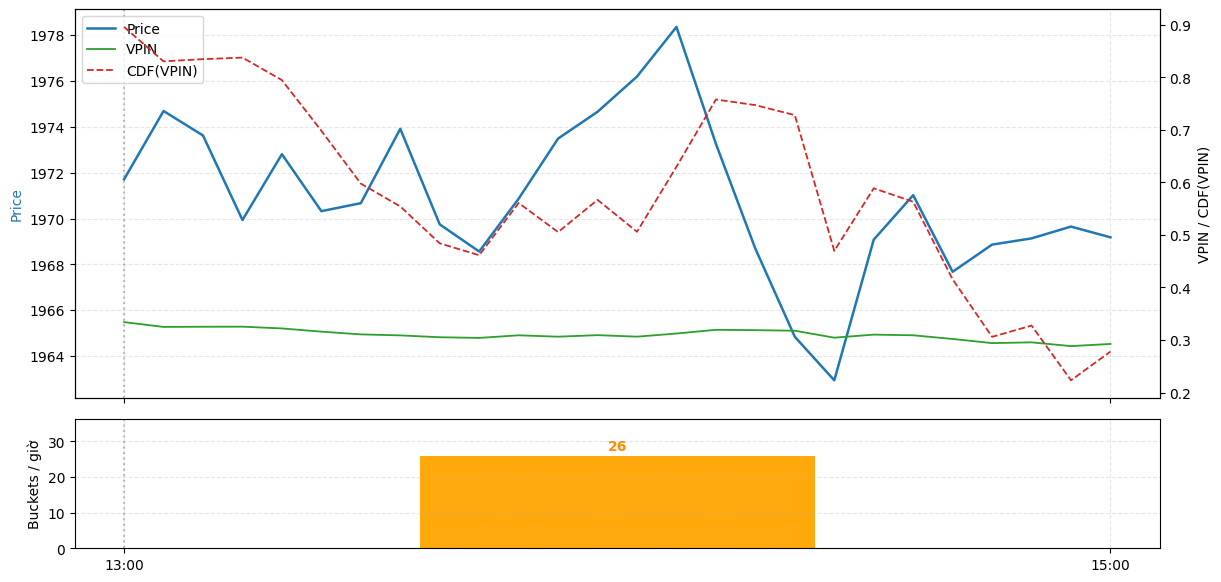

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-20.png


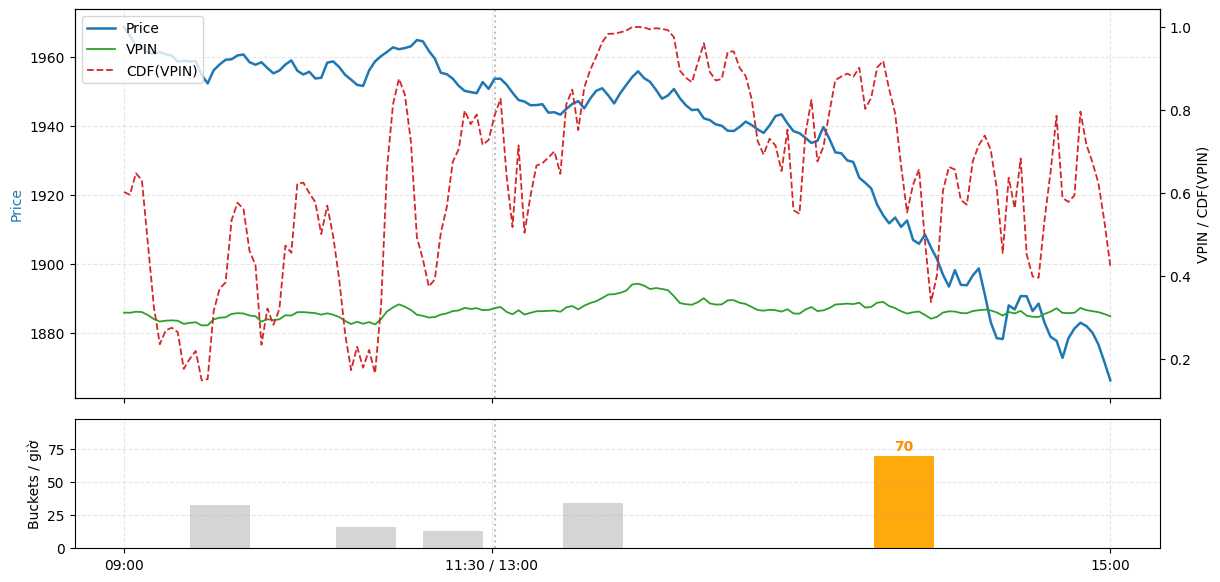

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-21.png


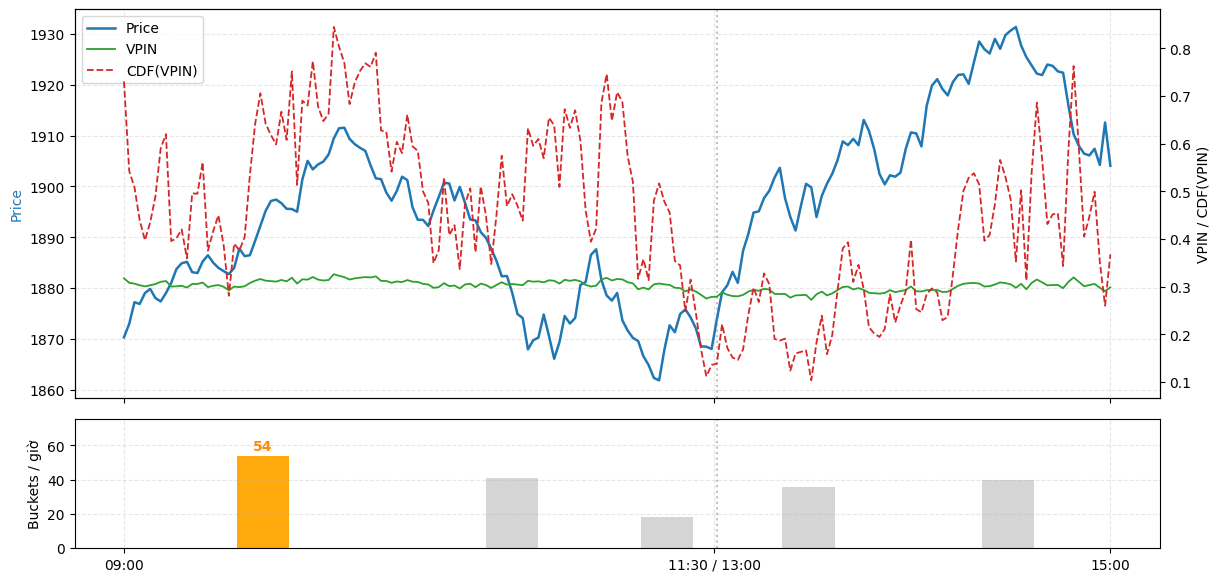

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-22.png


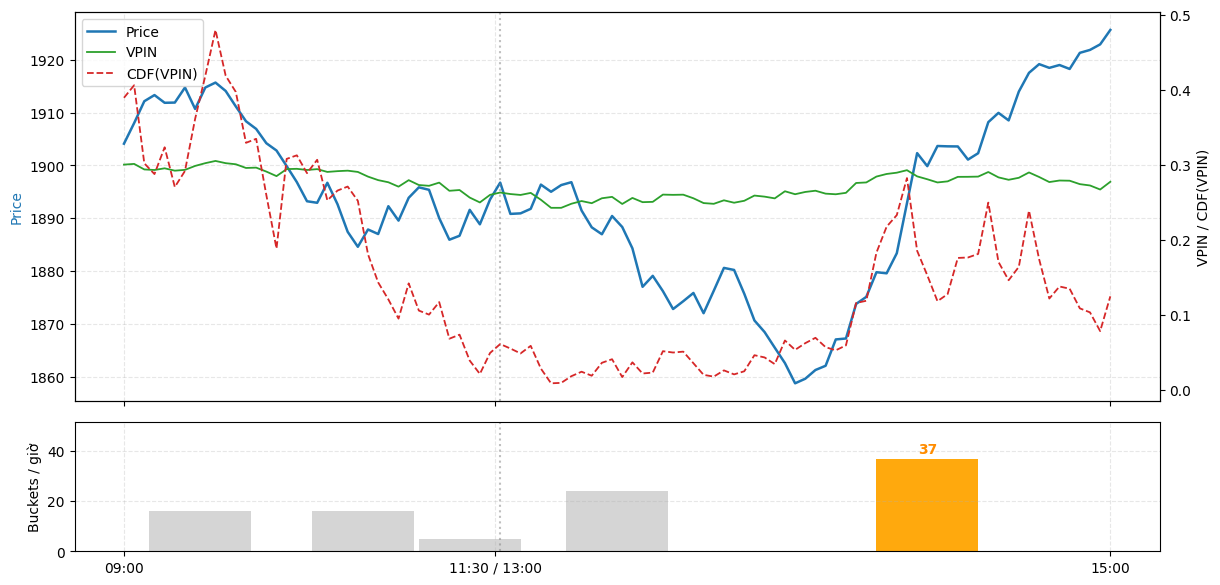

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-23.png


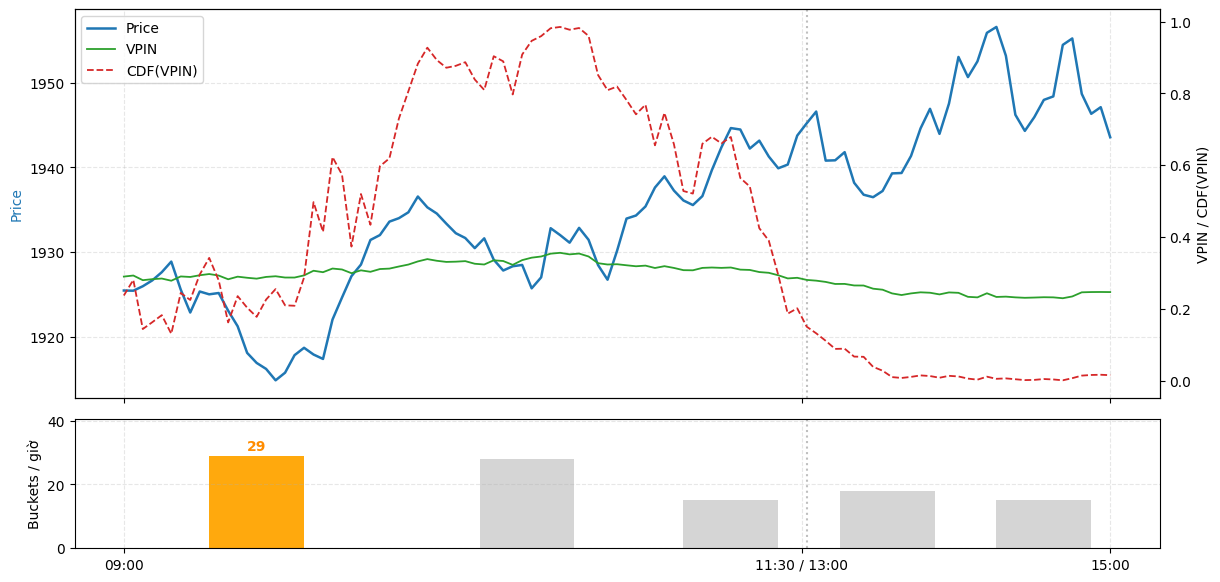

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-24.png


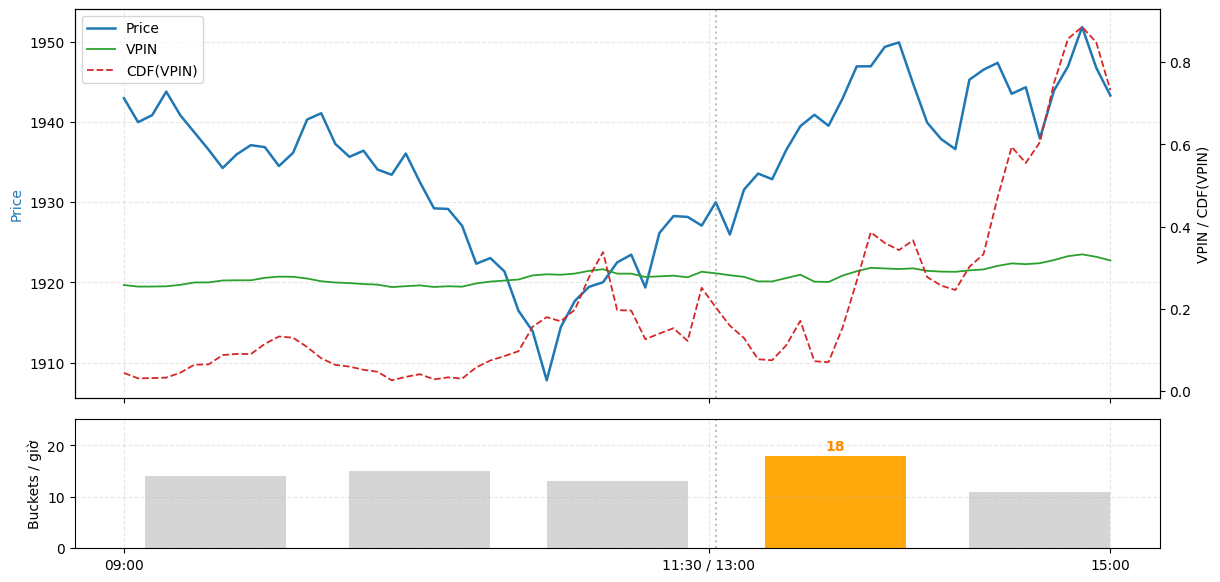

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-27.png


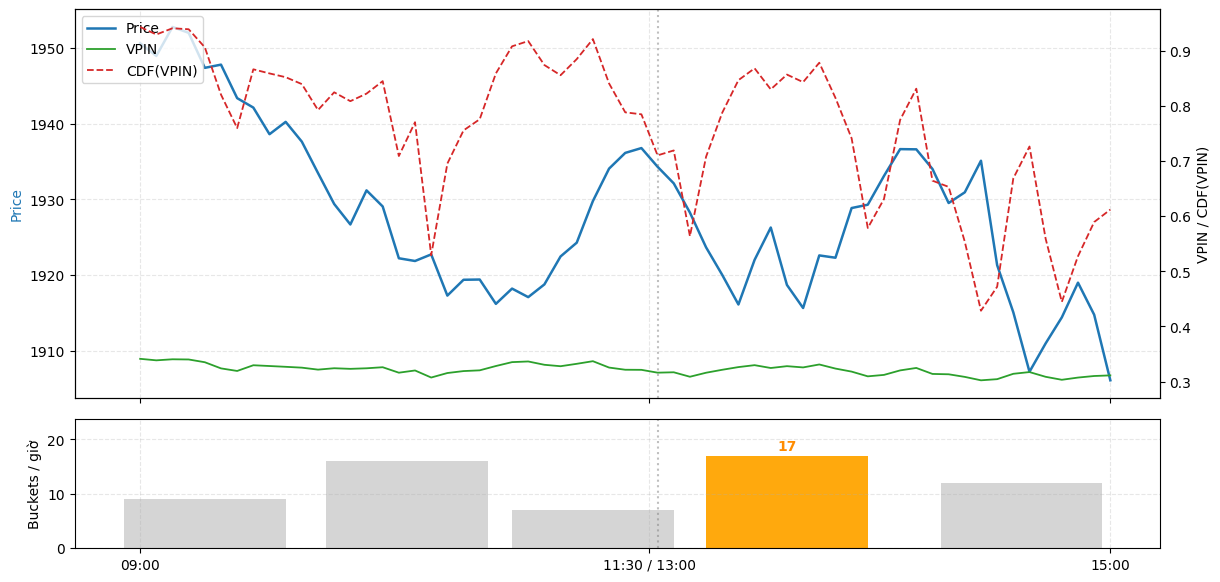

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-28.png


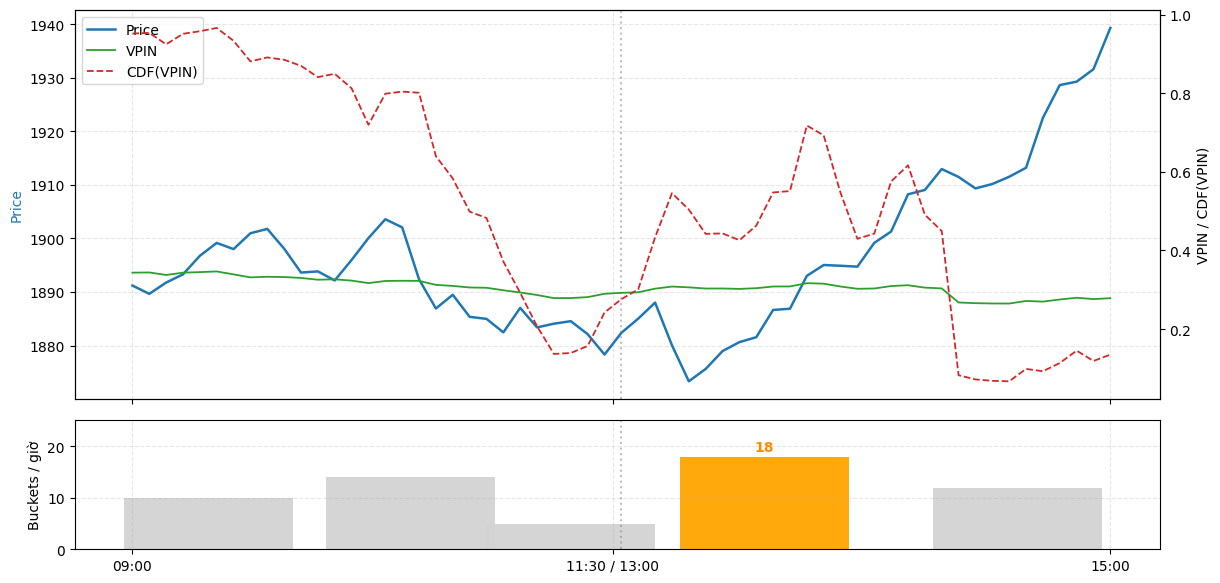

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-29.png


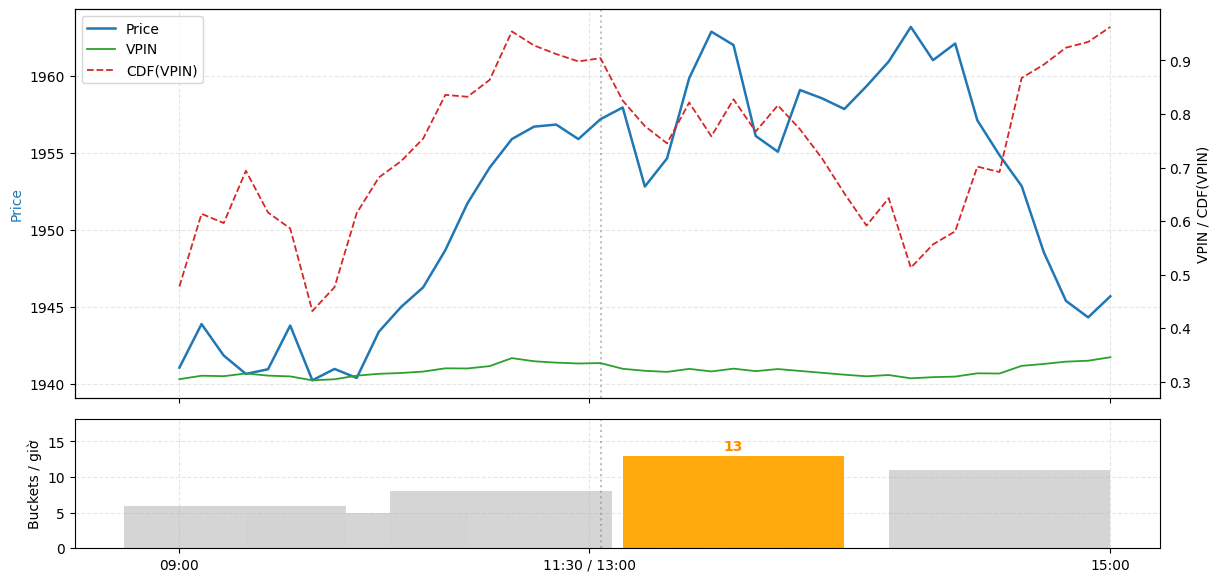

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-30.png


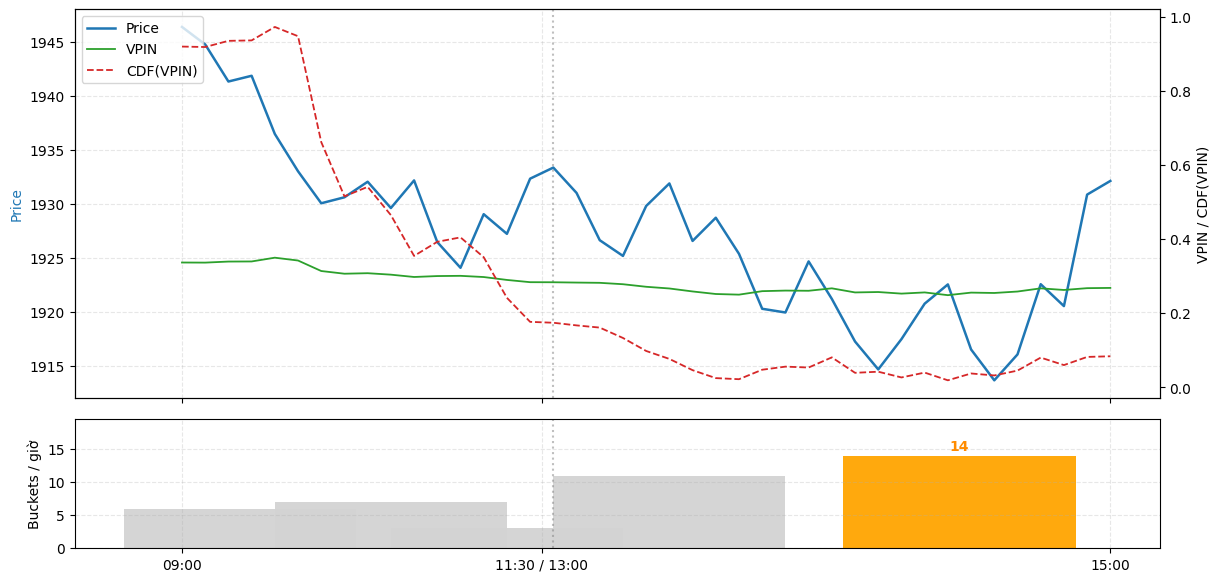

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-10-31.png


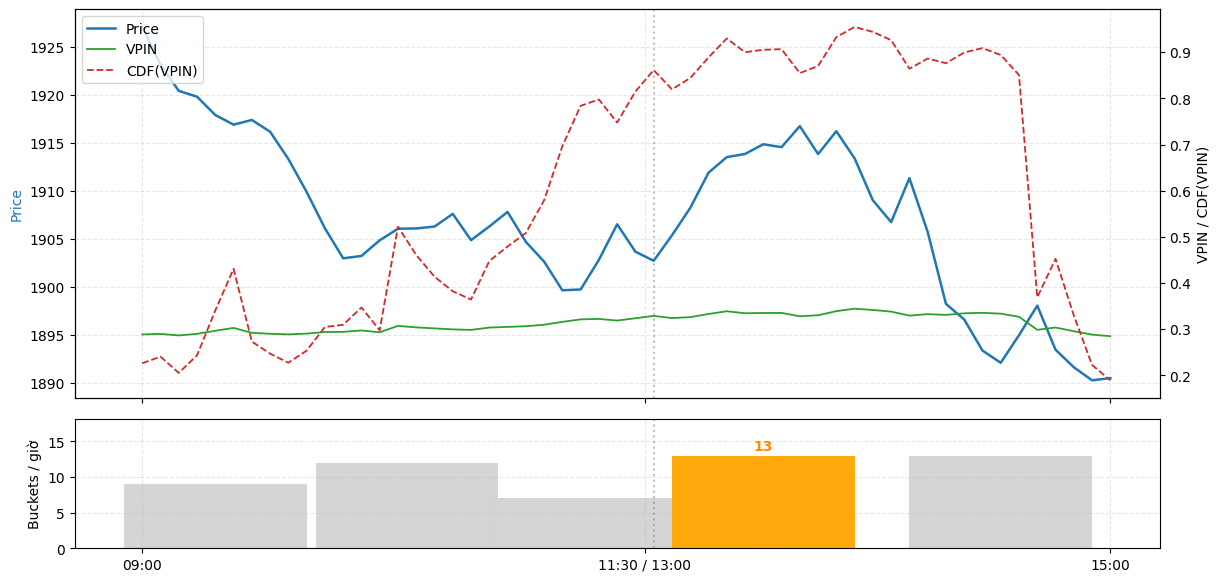

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-03.png


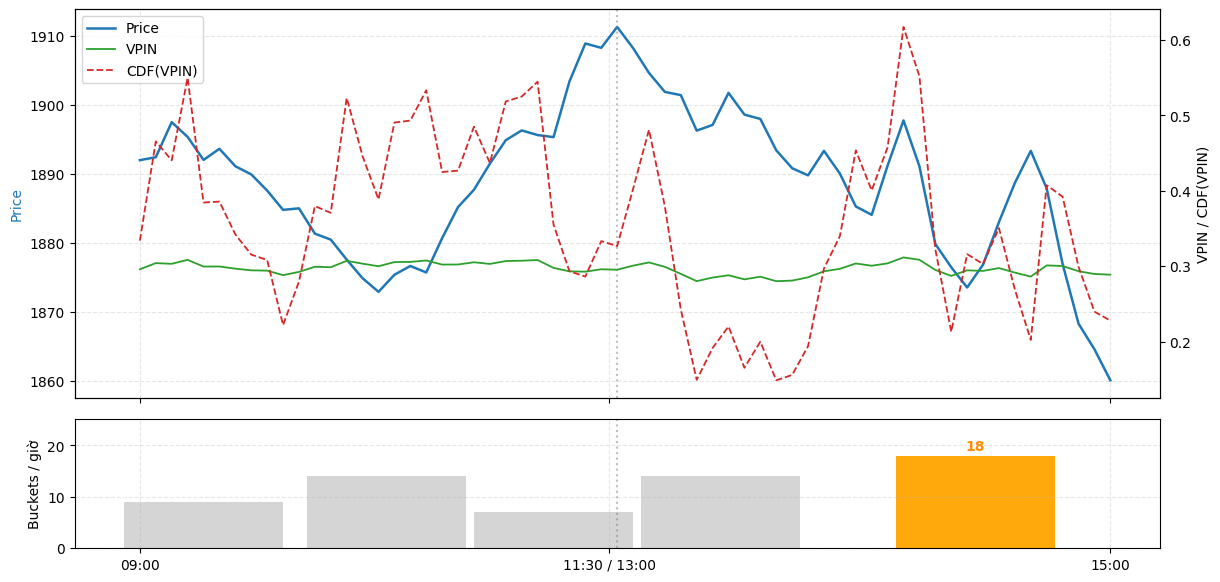

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-04.png


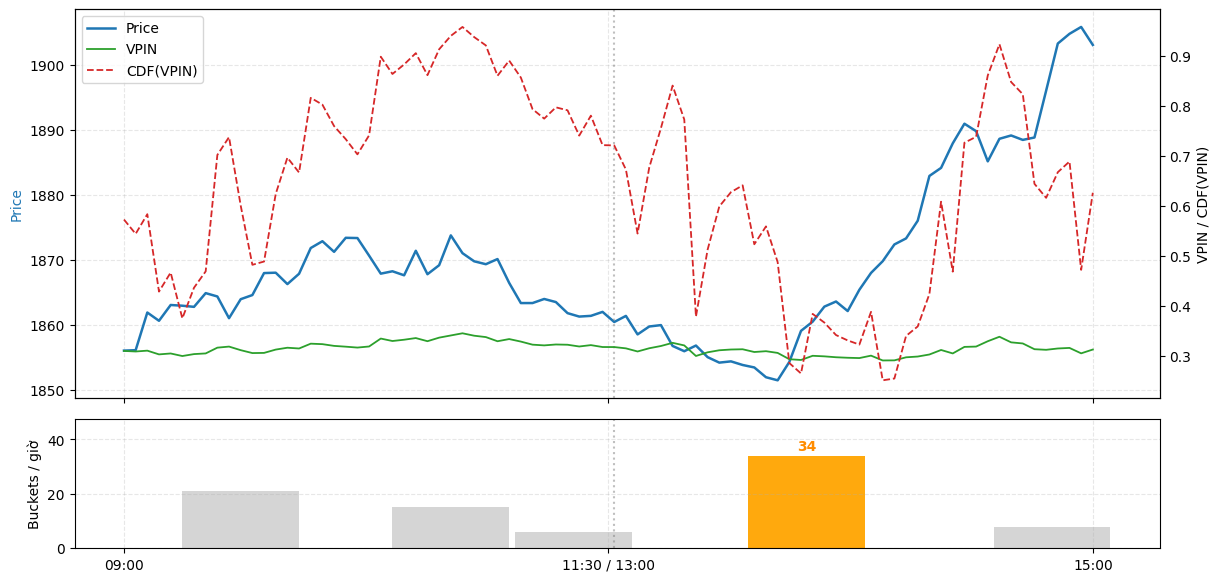

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-05.png


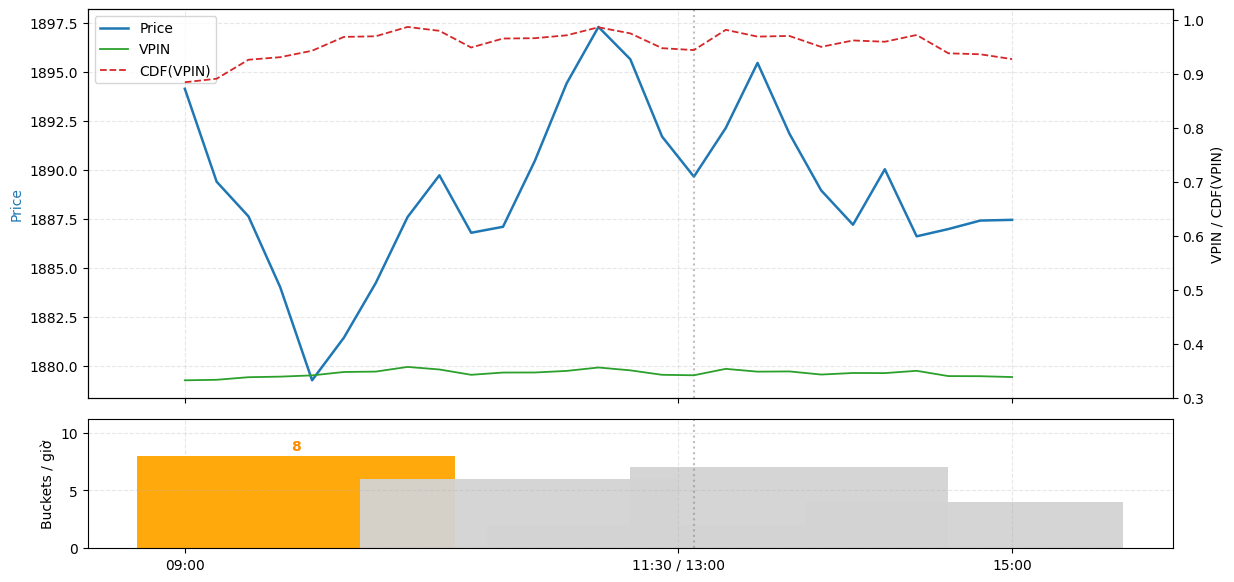

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-06.png


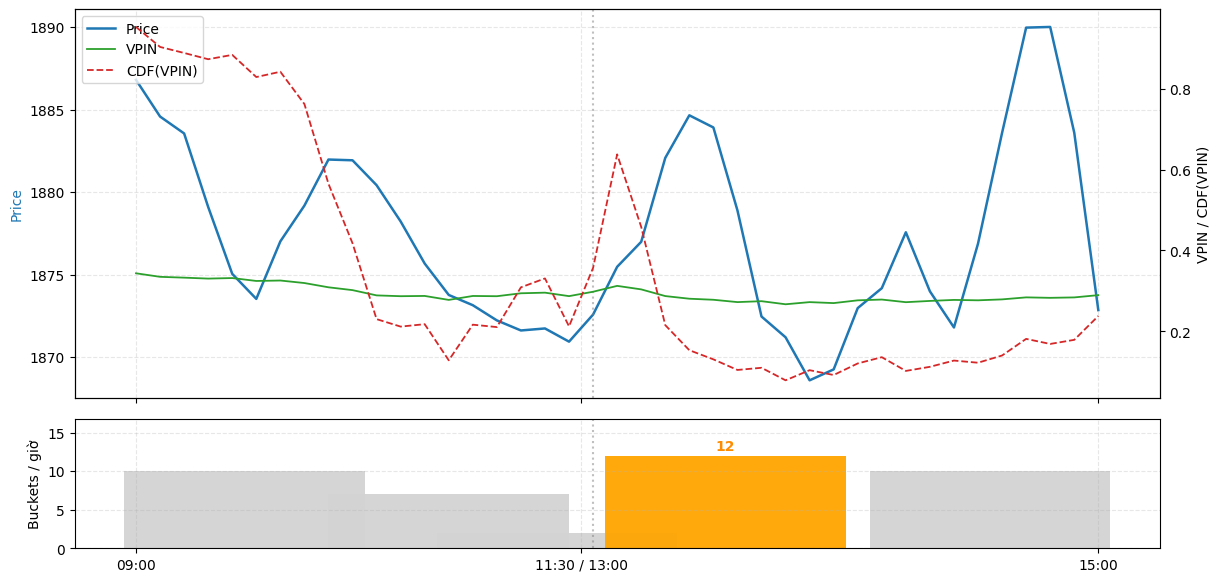

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-07.png


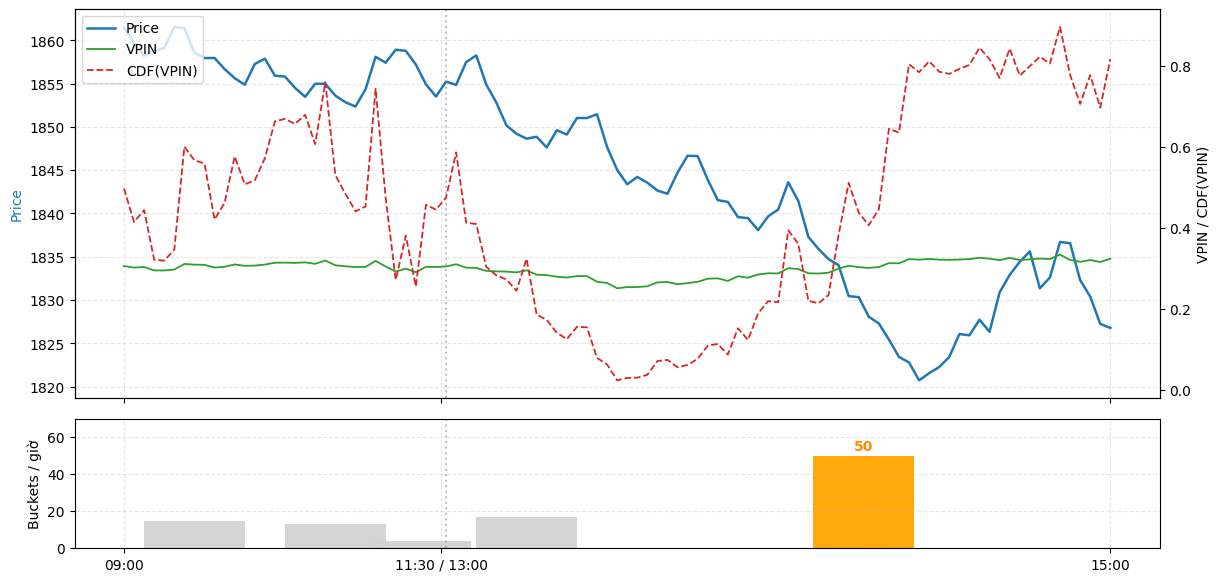

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-10.png


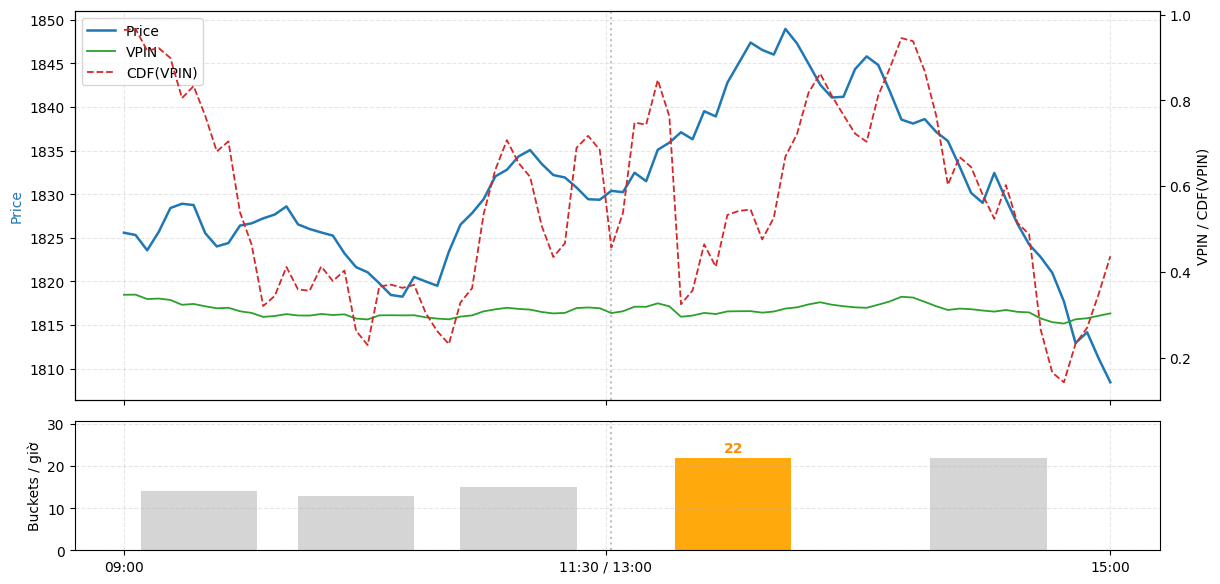

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-11.png


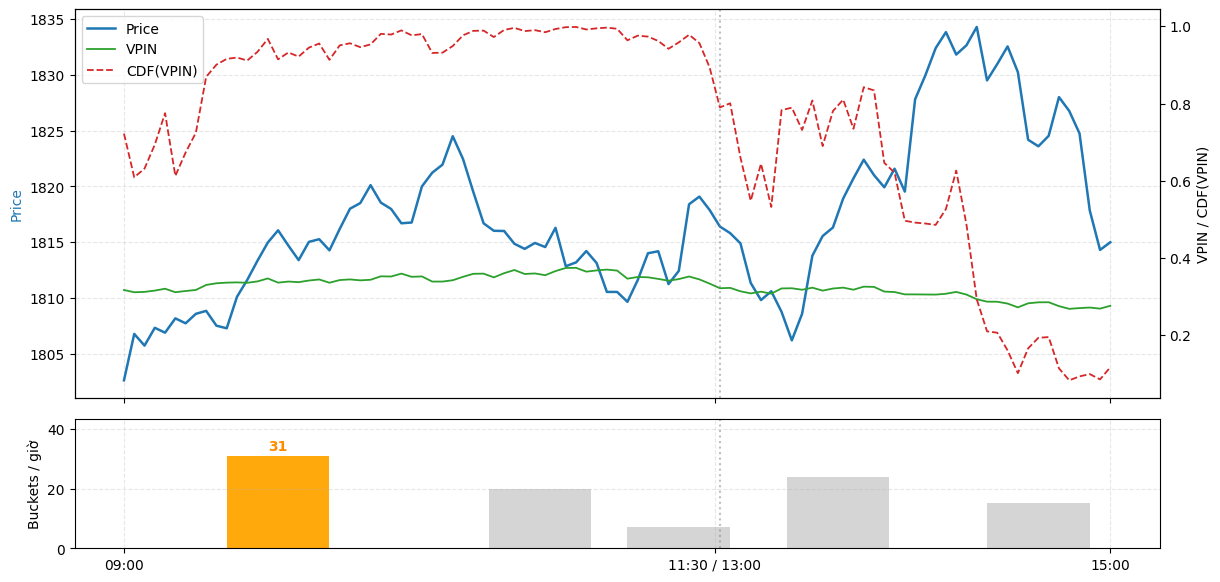

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-12.png


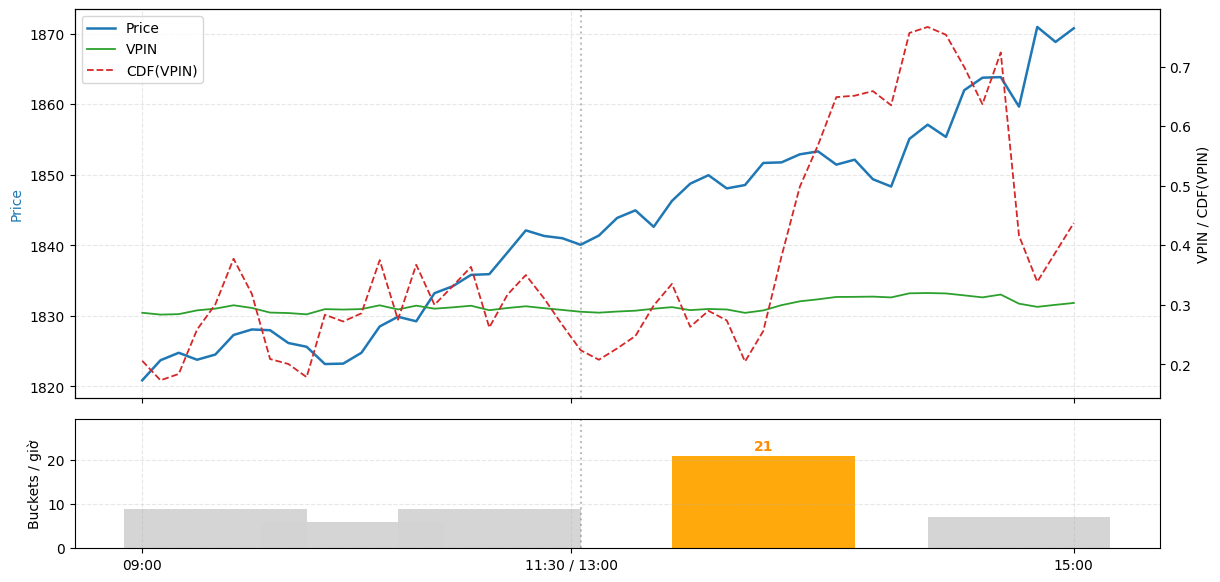

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-13.png


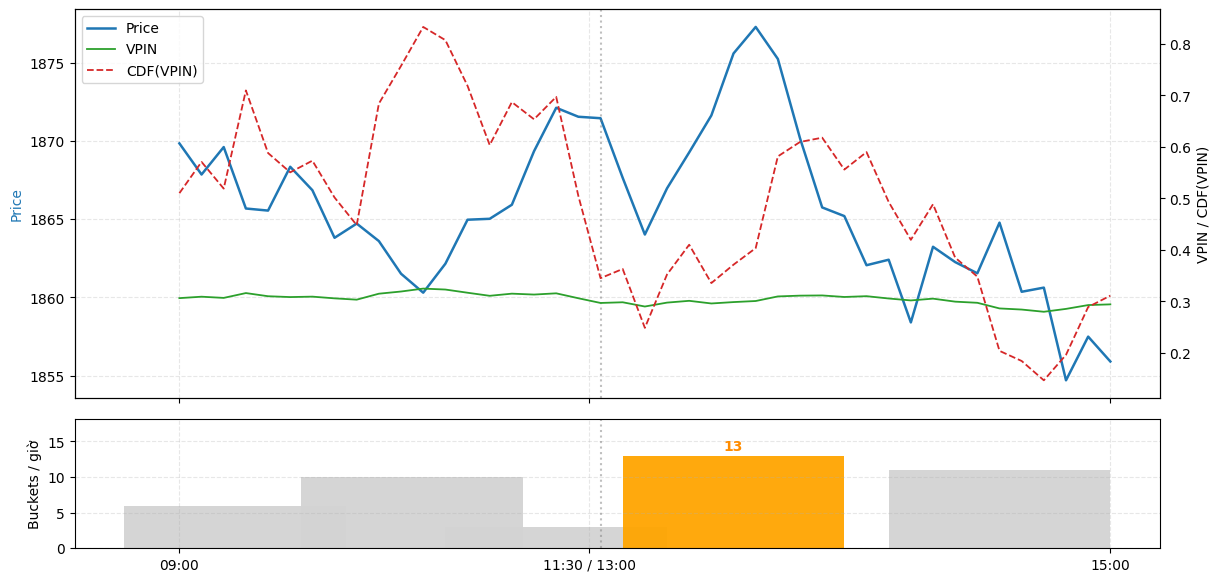

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-14.png


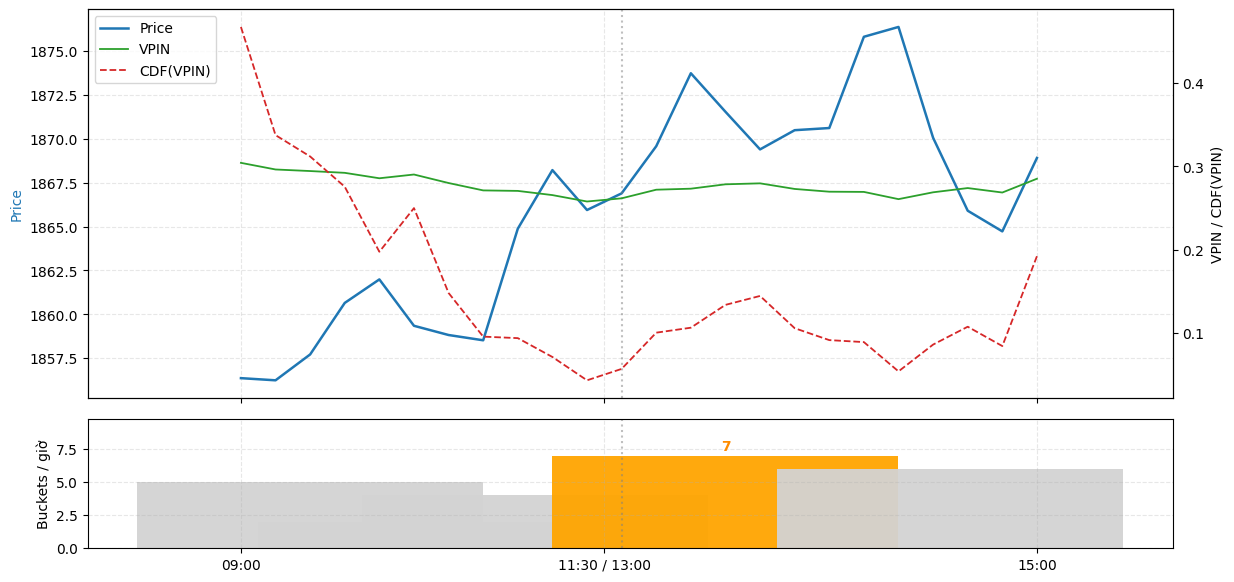

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-17.png


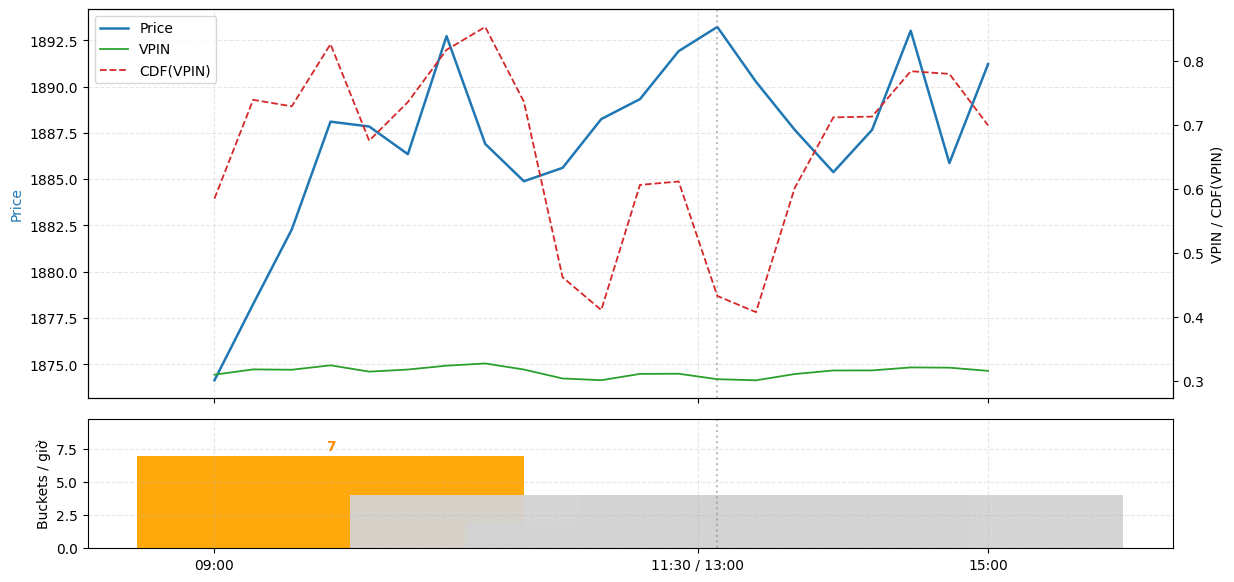

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-18.png


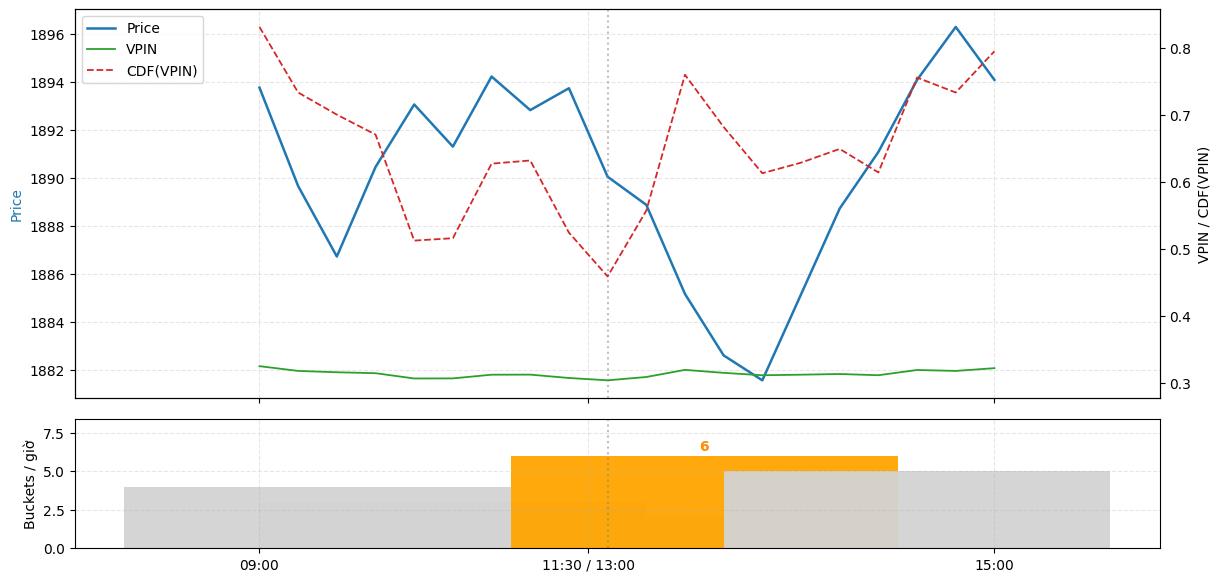

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-19.png


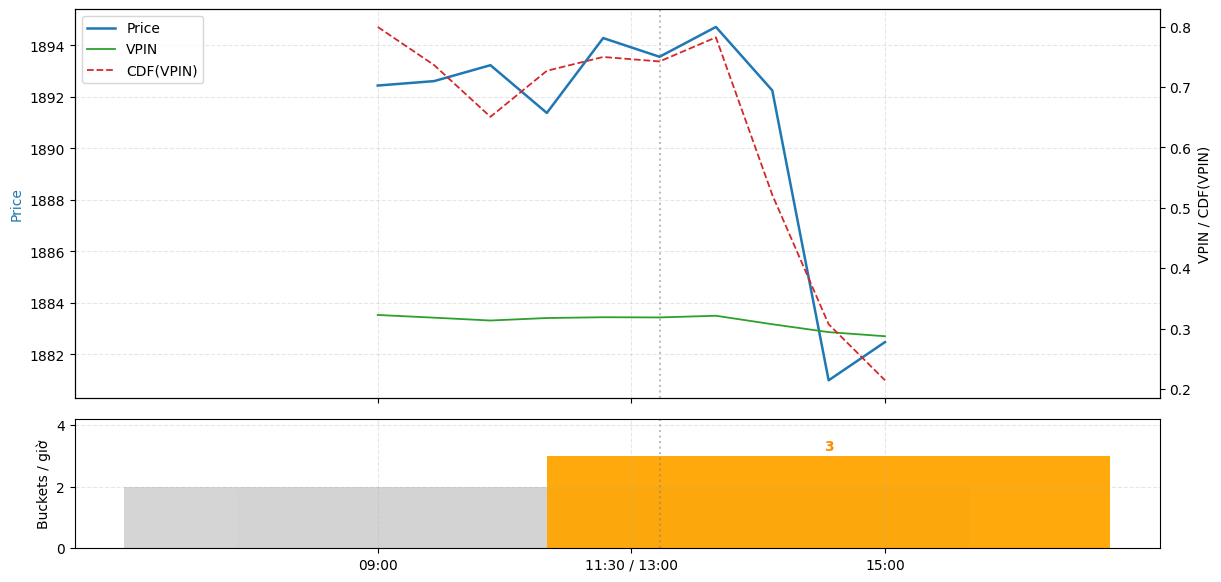

<Figure size 640x480 with 0 Axes>

Lưu biểu đồ: charts_by_day/2025-11-20.png


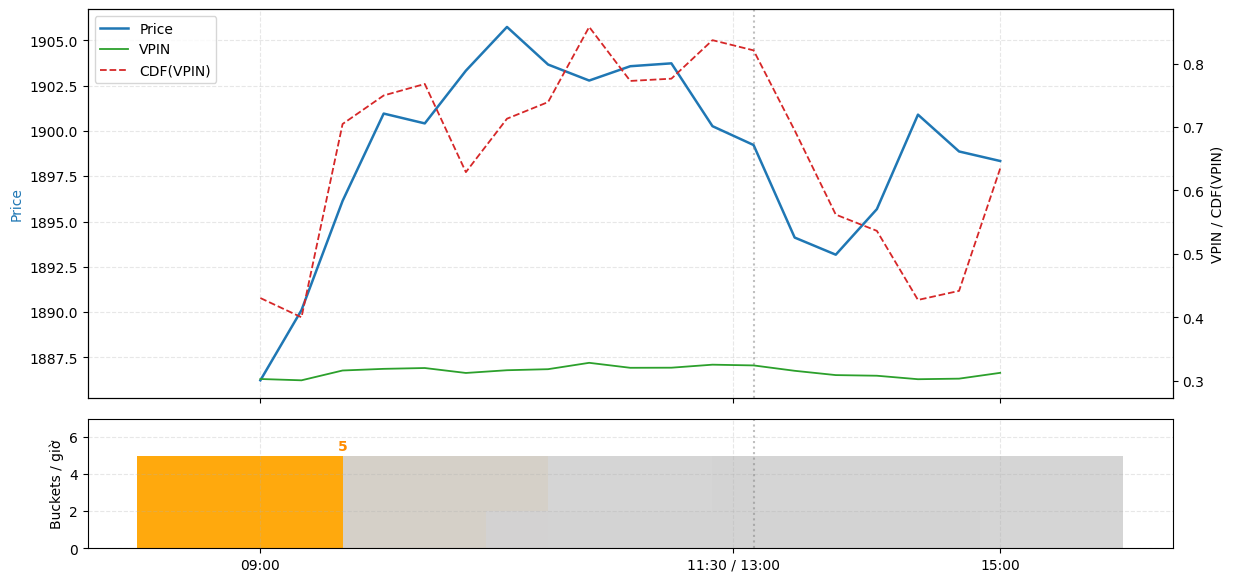

<Figure size 640x480 with 0 Axes>

🎉 Hoàn tất! Tất cả hình đã được lưu vào: charts_by_day


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ===========================
# 0. Chuẩn bị dữ liệu
# ===========================
df = data.dropna().copy()  # cột Time, Price, VPIN, CDF phải có sẵn
df["Time"] = pd.to_datetime(df["Time"], utc=False)

df = df.sort_values("Time").set_index("Time")

# ===========================
# 1. Tạo thư mục lưu ảnh
# ===========================
output_dir = "charts_by_day"
os.makedirs(output_dir, exist_ok=True)

# ===========================
# 2. Hàm vẽ 1 ngày
# ===========================
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ giao dịch ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Lọc phiên sáng + chiều
    df_trade = df_day[((times >= t9) & (times < t1130)) |
                      ((times >= t13) & (times < t15))].copy()
    if df_trade.empty:
        return

    df_trade["orig_time"] = df_trade.index
    df_trade["new_index"] = range(len(df_trade))
    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index")

    # ===========================
    # Tạo figure (2 hàng)
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1, figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # ======= PRICE + VPIN =======
    ax_price.plot(df_trade.index, df_trade["Price"], lw=1.8, label="Price", color="tab:blue")
    ax_vpin.plot(df_trade.index, df_trade["VPIN"], lw=1.3, label="VPIN", color="tab:green")
    ax_vpin.plot(df_trade.index, df_trade["CDF"], lw=1.3, ls="--", label="CDF(VPIN)", color="tab:red")

        # ===== Tick theo giờ thật =====
    xticks = []
    xtick_labels = []

    def get_session_ticks(start, end, label_start, label_end=None):
        sub = df_day.between_time(start, end)
        valid = [t for t in sub.index if t in time_to_new]
        if valid:
            start_idx = time_to_new[valid[0]]
            end_idx   = time_to_new[valid[-1]]
            xticks.append(start_idx)
            xtick_labels.append(label_start)
            if label_end:
                xticks.append(end_idx)
                xtick_labels.append(label_end)
            return start_idx, end_idx
        return None, None

    # Sáng: 09:00 – 11:30
    m_start, m_end = get_session_ticks("09:00", "11:30", "09:00", "11:30")

    # Chiều: 13:00 – 15:00
    a_start, a_end = get_session_ticks("13:00", "15:00", "13:00", "15:00")

    # ---- Gộp 11:30 và 13:00 để không bị trùng label ----
    if len(xticks) == 4:
        # xticks hiện tại: [09:00, 11:30, 13:00, 15:00]
        mid_break = (xticks[1] + xticks[2]) / 2.0
        xticks = [xticks[0], mid_break, xticks[3]]
        xtick_labels = [xtick_labels[0], "11:30 / 13:00", xtick_labels[3]]

    # Vẽ đường kẻ đứng đầu phiên chiều như cũ
    if a_start is not None:
        for ax in (ax_price, ax_cnt):
            ax.axvline(a_start, ls=":", color="grey", alpha=0.5)

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, ha="center")


    # ===========================
    # BUCKET COUNT theo giờ
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour").size().sort_index()

    hours = list(buckets_per_hour.index)
    buckets_vals = buckets_per_hour.values

    bar_x = []
    for h in hours:
        idxs = df_trade.index[df_trade["hour"] == h].to_numpy()
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    bar_w = 10  # yêu cầu: width = 20

    # Bar cao nhất highlight
    max_idx = buckets_vals.argmax()
    colors = ["orange" if i == max_idx else "lightgrey" for i in range(len(hours))]

    ax_cnt.bar(bar_x, buckets_vals, width=bar_w,
               color=colors, edgecolor="none", alpha=0.95)

    # Số trên bar cao nhất
    ax_cnt.text(
        bar_x[max_idx], buckets_vals[max_idx] * 1.03,
        str(int(buckets_vals[max_idx])),
        ha="center", va="bottom",
        fontsize=10, fontweight="bold",
        color="darkorange"
    )

    # ==== Fix chồng line chart ====
    ax_cnt.set_ylim(0, buckets_vals.max() * 1.4)
    plt.subplots_adjust(hspace=0.08)

    # ==== Decor ====
    ax_price.set_ylabel("Price", color="tab:blue")
    ax_price.grid(ls="--", alpha=0.3)
    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(ls="--", alpha=0.3)

    # ax_price.set_title(f"Price – VPIN – CDF(VPIN) | {date_str}")

    # Legend
    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.show()
    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)
    plt.show()


# ===========================
# 3. Loop theo từng ngày
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")
    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào:", output_dir)


In [18]:
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ giao dịch ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Lọc phiên sáng + chiều
    df_trade = df_day[((times >= t9) & (times < t1130)) |
                      ((times >= t13) & (times < t15))].copy()
    if df_trade.empty:
        return

    # ===========================
    # NEW: new_index = phút giao dịch (bỏ trưa), cùng scale sáng/chiều
    # ===========================
    df_trade["orig_time"] = df_trade.index

    day_date  = df_trade.index[0].normalize()
    t9_dt     = day_date + pd.Timedelta(hours=9)
    t1130_dt  = day_date + pd.Timedelta(hours=11, minutes=30)
    t13_dt    = day_date + pd.Timedelta(hours=13)

    morning_len = (t1130_dt - t9_dt).total_seconds() / 60.0  # 150 phút

    def to_trading_min(ts):
        if ts < t1130_dt:  # phiên sáng
            return (ts - t9_dt).total_seconds() / 60.0
        else:              # phiên chiều: cộng thêm 150 phút của phiên sáng
            return morning_len + (ts - t13_dt).total_seconds() / 60.0

    df_trade["new_index"] = df_trade["orig_time"].apply(to_trading_min)

    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index").sort_index()

    # ===========================
    # Tạo figure (2 hàng)
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1, figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # ======= PRICE + VPIN =======
    ax_price.plot(df_trade.index, df_trade["Price"], lw=1.8, label="Price", color="tab:blue")
    ax_vpin.plot(df_trade.index, df_trade["VPIN"], lw=1.3, label="VPIN", color="tab:green")
    ax_vpin.plot(df_trade.index, df_trade["CDF"],  lw=1.3, ls="--", label="CDF(VPIN)", color="tab:red")

    # ===== Tick theo giờ thật (dùng phút giao dịch) =====
    xticks = []
    xtick_labels = []

    def get_session_ticks(start, end, label_start, label_end=None):
        sub = df_day.between_time(start, end)
        valid = [t for t in sub.index if t in time_to_new]
        if valid:
            start_idx = time_to_new[valid[0]]
            end_idx   = time_to_new[valid[-1]]
            xticks.append(start_idx)
            xtick_labels.append(label_start)
            if label_end:
                xticks.append(end_idx)
                xtick_labels.append(label_end)
            return start_idx, end_idx
        return None, None

    # Sáng: 09:00 – 11:30
    m_start, m_end = get_session_ticks("09:00", "11:30", "09:00", "11:30")

    # Chiều: 13:00 – 15:00
    a_start, a_end = get_session_ticks("13:00", "15:00", "13:00", "15:00")

    # ---- Gộp 11:30 và 13:00 để không bị trùng label ----
    if len(xticks) == 4:
        # xticks lúc này tương ứng gần [0,150,150,270]
        mid_break = (xticks[1] + xticks[2]) / 2.0
        xticks = [xticks[0], mid_break, xticks[3]]
        xtick_labels = [xtick_labels[0], "11:30 / 13:00", xtick_labels[3]]

    # Vẽ đường kẻ đứng đầu phiên chiều
    if a_start is not None:
        for ax in (ax_price, ax_cnt):
            ax.axvline(a_start, ls=":", color="grey", alpha=0.5)

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, ha="center")

    # ===========================
    # BUCKET COUNT theo giờ (dùng cùng new_index)
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour").size().sort_index()

    hours = list(buckets_per_hour.index)
    buckets_vals = buckets_per_hour.values

    bar_x = []
    for h in hours:
        idxs = df_trade.index[df_trade["hour"] == h].to_numpy()
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    bar_w = 10

    # Bar cao nhất highlight
    max_idx = buckets_vals.argmax()
    colors = ["orange" if i == max_idx else "lightgrey" for i in range(len(hours))]

    ax_cnt.bar(bar_x, buckets_vals, width=bar_w,
               color=colors, edgecolor="none", alpha=0.95)

    ax_cnt.text(
        bar_x[max_idx], buckets_vals[max_idx] * 1.03,
        str(int(buckets_vals[max_idx])),
        ha="center", va="bottom",
        fontsize=10, fontweight="bold",
        color="darkorange"
    )

    ax_cnt.set_ylim(0, buckets_vals.max() * 1.4)
    plt.subplots_adjust(hspace=0.08)

    # ==== Decor ====
    ax_price.set_ylabel("Price", color="tab:blue")
    ax_price.grid(ls="--", alpha=0.3)
    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(ls="--", alpha=0.3)

    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)


In [19]:
# 3. Loop theo từng ngày
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")
    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào:", output_dir)

Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

In [20]:
df = data.dropna().copy()
df["Time"] = pd.to_datetime(df["Time"], utc=False)
df = df.sort_values("Time").set_index("Time")

# ====== GLOBAL Y LIMITS (tính 1 lần) ======
GLOBAL_PRICE_MIN = df["Price"].min()
GLOBAL_PRICE_MAX = df["Price"].max()

# VPIN & CDF dùng chung trục phải
GLOBAL_VPINAX_MIN = min(df["VPIN"].min(), df["CDF"].min())
GLOBAL_VPINAX_MAX = max(df["VPIN"].max(), df["CDF"].max())

# Buckets: tính max số bucket / giờ trên toàn bộ data
tmp = df.copy()
tmp = pd.concat([
    tmp.between_time("09:00", "11:30"),
    df.between_time("13:00", "15:00")
])

tmp["hour"] = tmp.index.floor("H")
GLOBAL_BUCKET_MAX = tmp.groupby("hour").size().max() * 1.4


In [21]:
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ giao dịch ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Lọc phiên sáng + chiều
    df_trade = df_day[((times >= t9) & (times < t1130)) |
                      ((times >= t13) & (times < t15))].copy()
    if df_trade.empty:
        return

    # ===========================
    # new_index = phút giao dịch (bỏ trưa), scale sáng/chiều đều nhau
    # ===========================
    df_trade["orig_time"] = df_trade.index

    day_date  = df_trade.index[0].normalize()
    t9_dt     = day_date + pd.Timedelta(hours=9)
    t1130_dt  = day_date + pd.Timedelta(hours=11, minutes=30)
    t13_dt    = day_date + pd.Timedelta(hours=13)

    morning_len = (t1130_dt - t9_dt).total_seconds() / 60.0  # 150 phút

    def to_trading_min(ts):
        if ts < t1130_dt:  # phiên sáng
            return (ts - t9_dt).total_seconds() / 60.0
        else:              # phiên chiều = sáng + phút từ 13:00
            return morning_len + (ts - t13_dt).total_seconds() / 60.0

    df_trade["new_index"] = df_trade["orig_time"].apply(to_trading_min)

    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index").sort_index()

    # ===========================
    # Tạo figure (2 hàng)
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1, figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # ===========================
    # BÔI MÀU ĐOẠN CDF > 0.9 (THEO new_index)
    # ===========================
    mask_high = df_trade["CDF"] > 0.9
    if mask_high.any():
        idx_series = df_trade.index
        in_span = False
        spans = []
        start = None
        prev_x = None

        for x, is_high in zip(idx_series, mask_high):
            if is_high and not in_span:
                # bắt đầu đoạn mới
                in_span = True
                start = x
                prev_x = x
            elif is_high and in_span:
                # tiếp tục đoạn
                prev_x = x
            elif (not is_high) and in_span:
                # kết thúc đoạn
                spans.append((start, prev_x))
                in_span = False
                start = None
                prev_x = None

        # nếu kết thúc vòng lặp mà vẫn đang trong đoạn high
        if in_span and start is not None:
            spans.append((start, prev_x))

        # Vẽ shading cho cả 2 subplot (price+vpin & buckets)
        for s, e in spans:
            ax_price.axvspan(s, e, color="red", alpha=0.08)
            ax_cnt.axvspan(s, e, color="red", alpha=0.08)

    # ======= PRICE + VPIN =======
    ax_price.plot(df_trade.index, df_trade["Price"], lw=1.8, label="Price", color="tab:blue")
    ax_vpin.plot(df_trade.index, df_trade["VPIN"], lw=1.3, label="VPIN", color="tab:green")
    ax_vpin.plot(df_trade.index, df_trade["CDF"],  lw=1.3, ls="--", label="CDF(VPIN)", color="tab:red")

    # ======= Fix Y-axis toàn cục =======
    ax_price.set_ylim(GLOBAL_PRICE_MIN, GLOBAL_PRICE_MAX)
    ax_vpin.set_ylim(GLOBAL_VPINAX_MIN, GLOBAL_VPINAX_MAX)

    # ===== Tick theo giờ thật (dùng phút giao dịch) =====
    xticks = []
    xtick_labels = []

    def get_session_ticks(start, end, label_start, label_end=None):
        sub = df_day.between_time(start, end)
        valid = [t for t in sub.index if t in time_to_new]
        if valid:
            start_idx = time_to_new[valid[0]]
            end_idx   = time_to_new[valid[-1]]
            xticks.append(start_idx)
            xtick_labels.append(label_start)
            if label_end:
                xticks.append(end_idx)
                xtick_labels.append(label_end)
            return start_idx, end_idx
        return None, None

    # Tick phiên sáng và chiều
    m_start, m_end = get_session_ticks("09:00", "11:30", "09:00", "11:30")
    a_start, a_end = get_session_ticks("13:00", "15:00", "13:00", "15:00")

    # Gộp break buổi trưa
    if len(xticks) == 4:
        mid_break = (xticks[1] + xticks[2]) / 2.0
        xticks = [xticks[0], mid_break, xticks[3]]
        xtick_labels = [xtick_labels[0], "11:30/13:00", xtick_labels[3]]

    # Vẽ trục & label
    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, ha="center")

    # Vẽ đường phân tách phiên chiều
    if a_start is not None:
        for ax in (ax_price, ax_cnt):
            ax.axvline(a_start, ls=":", color="grey", alpha=0.5)

    # ===========================
    # BUCKET COUNT theo giờ
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour").size().sort_index()

    hours = list(buckets_per_hour.index)
    buckets_vals = buckets_per_hour.values

    bar_x = []
    for h in hours:
        idxs = df_trade.index[df_trade["hour"] == h].to_numpy()
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    bar_w = 10
    max_idx = buckets_vals.argmax()
    colors = ["orange" if i == max_idx else "lightgrey" for i in range(len(hours))]

    ax_cnt.bar(bar_x, buckets_vals, width=bar_w,
               color=colors, edgecolor="none", alpha=0.95)

    # Hiển thị số bucket cao nhất
    ax_cnt.text(
        bar_x[max_idx], buckets_vals[max_idx] * 1.03,
        str(int(buckets_vals[max_idx])),
        ha="center", va="bottom",
        fontsize=10, fontweight="bold",
        color="darkorange"
    )

    # Fix bucket Y-axis toàn cục
    ax_cnt.set_ylim(0, GLOBAL_BUCKET_MAX)

    plt.subplots_adjust(hspace=0.08)

    # Decor
    ax_price.set_ylabel("Price")
    ax_price.grid(ls="--", alpha=0.3)
    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(ls="--", alpha=0.3)

    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)


In [22]:
# 3. Loop theo từng ngày
# ===========================
for day, df_day in df.groupby(df.index.date):
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")
    print(f"Lưu biểu đồ: {save_path}")
    plot_one_day(df_day, date_str, save_path)

print("🎉 Hoàn tất! Tất cả hình đã được lưu vào:", output_dir)

Lưu biểu đồ: charts_by_day/2025-10-17.png
Lưu biểu đồ: charts_by_day/2025-10-20.png
Lưu biểu đồ: charts_by_day/2025-10-21.png
Lưu biểu đồ: charts_by_day/2025-10-22.png
Lưu biểu đồ: charts_by_day/2025-10-23.png
Lưu biểu đồ: charts_by_day/2025-10-24.png
Lưu biểu đồ: charts_by_day/2025-10-27.png
Lưu biểu đồ: charts_by_day/2025-10-28.png
Lưu biểu đồ: charts_by_day/2025-10-29.png
Lưu biểu đồ: charts_by_day/2025-10-30.png
Lưu biểu đồ: charts_by_day/2025-10-31.png
Lưu biểu đồ: charts_by_day/2025-11-03.png
Lưu biểu đồ: charts_by_day/2025-11-04.png
Lưu biểu đồ: charts_by_day/2025-11-05.png
Lưu biểu đồ: charts_by_day/2025-11-06.png
Lưu biểu đồ: charts_by_day/2025-11-07.png
Lưu biểu đồ: charts_by_day/2025-11-10.png
Lưu biểu đồ: charts_by_day/2025-11-11.png
Lưu biểu đồ: charts_by_day/2025-11-12.png
Lưu biểu đồ: charts_by_day/2025-11-13.png
Lưu biểu đồ: charts_by_day/2025-11-14.png
Lưu biểu đồ: charts_by_day/2025-11-17.png
Lưu biểu đồ: charts_by_day/2025-11-18.png
Lưu biểu đồ: charts_by_day/2025-11

# BỎ NGÀY 20 THÁNG 10

In [23]:
import datetime
import pandas as pd

# df đã có: index = Time (datetime), cột Price, VPIN, CDF

# Bỏ ngày 20/10 để TÍNH SCALE
mask_not_20 = df.index.date != datetime.date(2025, 10, 20)
df_scale = df.loc[mask_not_20].copy()

# Chỉ lấy giờ giao dịch
trading_scale = pd.concat([
    df_scale.between_time("09:00", "11:30"),
    df_scale.between_time("13:00", "15:00"),
])

# Global Y cho Price
GLOBAL_PRICE_MIN = trading_scale["Price"].min()
GLOBAL_PRICE_MAX = trading_scale["Price"].max()

# Global Y cho VPIN/CDF
GLOBAL_VPINAX_MIN = min(trading_scale["VPIN"].min(), trading_scale["CDF"].min())
GLOBAL_VPINAX_MAX = max(trading_scale["VPIN"].max(), trading_scale["CDF"].max())

# Global Y cho bucket
tmp = trading_scale.copy()
tmp["hour"] = tmp.index.floor("H")
GLOBAL_BUCKET_MAX = tmp.groupby("hour").size().max() * 1.4  # giống logic trước


In [24]:
import datetime
import pandas as pd

# df đã có: index = Time (datetime), cột Price, VPIN, CDF

# Bỏ ngày 20/10 để TÍNH SCALE
mask_not_20 = df.index.date != datetime.date(2025, 10, 20)
df_scale = df.loc[mask_not_20].copy()

# Chỉ lấy giờ giao dịch
trading_scale = pd.concat([
    df_scale.between_time("09:00", "11:30"),
    df_scale.between_time("13:00", "15:00"),
])

# Global Y cho Price
GLOBAL_PRICE_MIN = trading_scale["Price"].min()
GLOBAL_PRICE_MAX = trading_scale["Price"].max()

# Global Y cho VPIN/CDF
GLOBAL_VPINAX_MIN = min(trading_scale["VPIN"].min(), trading_scale["CDF"].min())
GLOBAL_VPINAX_MAX = max(trading_scale["VPIN"].max(), trading_scale["CDF"].max())

# Global Y cho bucket
tmp = trading_scale.copy()
tmp["hour"] = tmp.index.floor("H")
GLOBAL_BUCKET_MAX = tmp.groupby("hour").size().max() * 1.4  # giống logic trước


In [25]:
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ giao dịch ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Lọc phiên sáng + chiều
    df_trade = df_day[((times >= t9) & (times < t1130)) |
                      ((times >= t13) & (times < t15))].copy()
    if df_trade.empty:
        return

    # ===========================
    # new_index = phút giao dịch (bỏ trưa), scale sáng/chiều đều nhau
    # ===========================
    df_trade["orig_time"] = df_trade.index

    day_date  = df_trade.index[0].normalize()
    t9_dt     = day_date + pd.Timedelta(hours=9)
    t1130_dt  = day_date + pd.Timedelta(hours=11, minutes=30)
    t13_dt    = day_date + pd.Timedelta(hours=13)

    morning_len = (t1130_dt - t9_dt).total_seconds() / 60.0  # 150 phút

    def to_trading_min(ts):
        if ts < t1130_dt:  # phiên sáng
            return (ts - t9_dt).total_seconds() / 60.0
        else:              # phiên chiều = sáng + phút từ 13:00
            return morning_len + (ts - t13_dt).total_seconds() / 60.0

    df_trade["new_index"] = df_trade["orig_time"].apply(to_trading_min)

    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index").sort_index()

    # ===========================
    # Tạo figure (2 hàng)
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1, figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # ===========================
    # BÔI MÀU ĐOẠN CDF > 0.9 (THEO new_index)
    # ===========================
    mask_high = (df_trade["CDF"] > 0.9)
    if mask_high.any():
        idx_series = df_trade.index
        in_span = False
        spans = []
        start = None
        prev_x = None

        for x, is_high in zip(idx_series, mask_high):
            if is_high and not in_span:
                in_span = True
                start = x
                prev_x = x
            elif is_high and in_span:
                prev_x = x
            elif (not is_high) and in_span:
                spans.append((start, prev_x))
                in_span = False
                start = None
                prev_x = None

        if in_span and start is not None:
            spans.append((start, prev_x))

        for s, e in spans:
            ax_price.axvspan(s, e, color="red", alpha=0.08)
            ax_cnt.axvspan(s, e, color="red", alpha=0.08)

    # ===========================
    # BÔI MÀU ĐOẠN GIẢM MẠNH TRONG LOOKBACK 10 BUCKET
    # (max(Price) - min(Price) >= 30 điểm)
    # ===========================
    roll = df_trade["Price"].rolling(window=10, min_periods=10)
    price_range = roll.max() - roll.min()
    mask_drop10 = price_range.ge(30).fillna(False)

    if mask_drop10.any():
        idx_series = df_trade.index
        in_span = False
        spans_drop = []
        start = None
        prev_x = None

        for x, flag in zip(idx_series, mask_drop10):
            if flag and not in_span:
                in_span = True
                start = x
                prev_x = x
            elif flag and in_span:
                prev_x = x
            elif (not flag) and in_span:
                spans_drop.append((start, prev_x))
                in_span = False
                start = None
                prev_x = None

        if in_span and start is not None:
            spans_drop.append((start, prev_x))

        # Tô màu cam nhạt cho các đoạn giảm mạnh
        for s, e in spans_drop:
            ax_price.axvspan(s, e, color="orange", alpha=0.12)
            ax_cnt.axvspan(s, e, color="orange", alpha=0.12)

    # ======= PRICE + VPIN =======
    ax_price.plot(df_trade.index, df_trade["Price"], lw=1.8, label="Price", color="tab:blue")
    ax_vpin.plot(df_trade.index, df_trade["VPIN"],  lw=1.3, label="VPIN", color="tab:green")
    ax_vpin.plot(df_trade.index, df_trade["CDF"],   lw=1.3, ls="--", label="CDF(VPIN)", color="tab:red")

    # ======= Fix Y-axis toàn cục (đã tính, KHÔNG gồm ngày 20/10) =======
    ax_price.set_ylim(GLOBAL_PRICE_MIN, GLOBAL_PRICE_MAX)
    ax_vpin.set_ylim(GLOBAL_VPINAX_MIN, GLOBAL_VPINAX_MAX)

    # ===== Tick theo giờ thật (dùng phút giao dịch) =====
    xticks = []
    xtick_labels = []

    def get_session_ticks(start, end, label_start, label_end=None):
        sub = df_day.between_time(start, end)
        valid = [t for t in sub.index if t in time_to_new]
        if valid:
            start_idx = time_to_new[valid[0]]
            end_idx   = time_to_new[valid[-1]]
            xticks.append(start_idx)
            xtick_labels.append(label_start)
            if label_end:
                xticks.append(end_idx)
                xtick_labels.append(label_end)
            return start_idx, end_idx
        return None, None

    m_start, m_end = get_session_ticks("09:00", "11:30", "09:00", "11:30")
    a_start, a_end = get_session_ticks("13:00", "15:00", "13:00", "15:00")

    if len(xticks) == 4:
        mid_break = (xticks[1] + xticks[2]) / 2.0
        xticks = [xticks[0], mid_break, xticks[3]]
        xtick_labels = [xtick_labels[0], "11:30/13:00", xtick_labels[3]]

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, ha="center")

    if a_start is not None:
        for ax in (ax_price, ax_cnt):
            ax.axvline(a_start, ls=":", color="grey", alpha=0.5)

    # ===========================
    # BUCKET COUNT theo giờ
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour").size().sort_index()

    hours = list(buckets_per_hour.index)
    buckets_vals = buckets_per_hour.values

    bar_x = []
    for h in hours:
        idxs = df_trade.index[df_trade["hour"] == h].to_numpy()
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    bar_w = 10
    max_idx = buckets_vals.argmax()
    colors = ["orange" if i == max_idx else "lightgrey" for i in range(len(hours))]

    ax_cnt.bar(bar_x, buckets_vals, width=bar_w,
               color=colors, edgecolor="none", alpha=0.95)

    ax_cnt.text(
        bar_x[max_idx], buckets_vals[max_idx] * 1.03,
        str(int(buckets_vals[max_idx])),
        ha="center", va="bottom",
        fontsize=10, fontweight="bold",
        color="darkorange"
    )

    ax_cnt.set_ylim(0, GLOBAL_BUCKET_MAX)

    plt.subplots_adjust(hspace=0.08)

    ax_price.set_ylabel("Price")
    ax_price.grid(ls="--", alpha=0.3)
    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(ls="--", alpha=0.3)

    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)


In [26]:
output_dir

'charts_by_day'

In [31]:
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ giao dịch ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Lọc phiên sáng + chiều
    df_trade = df_day[((times >= t9) & (times < t1130)) |
                      ((times >= t13) & (times < t15))].copy()
    if df_trade.empty:
        return

    # ===========================
    # new_index = phút giao dịch (bỏ trưa), scale sáng/chiều đều nhau
    # ===========================
    df_trade["orig_time"] = df_trade.index

    day_date  = df_trade.index[0].normalize()
    t9_dt     = day_date + pd.Timedelta(hours=9)
    t1130_dt  = day_date + pd.Timedelta(hours=11, minutes=30)
    t13_dt    = day_date + pd.Timedelta(hours=13)

    morning_len = (t1130_dt - t9_dt).total_seconds() / 60.0  # 150 phút

    def to_trading_min(ts):
        if ts < t1130_dt:  # phiên sáng
            return (ts - t9_dt).total_seconds() / 60.0
        else:              # phiên chiều = sáng + phút từ 13:00
            return morning_len + (ts - t13_dt).total_seconds() / 60.0

    df_trade["new_index"] = df_trade["orig_time"].apply(to_trading_min)

    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index").sort_index()

    # ===========================
    # Tạo figure (2 hàng)
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1, figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # ===========================
    # BÔI MÀU ĐOẠN CDF > 0.9 (THEO new_index)
    # ===========================
    mask_high = (df_trade["CDF"] > 0.9)
    if mask_high.any():
        idx_series = df_trade.index
        in_span = False
        spans = []
        start = None
        prev_x = None

        for x, is_high in zip(idx_series, mask_high):
            if is_high and not in_span:
                in_span = True
                start = x
                prev_x = x
            elif is_high and in_span:
                prev_x = x
            elif (not is_high) and in_span:
                spans.append((start, prev_x))
                in_span = False
                start = None
                prev_x = None

        if in_span and start is not None:
            spans.append((start, prev_x))

        for s, e in spans:
            ax_price.axvspan(s, e, color="red", alpha=0.08)
            ax_cnt.axvspan(s, e, color="red", alpha=0.08)

    # ===========================
    # BÔI MÀU ĐOẠN GIẢM MẠNH TRONG LOOKBACK 20 BUCKET
    # (max(Price) - min(Price) >= 30 điểm)
    # ===========================
    roll = df_trade["Price"].rolling(window=20, min_periods=20)
    price_range = roll.max() - roll.min()
    mask_drop20 = price_range.ge(30).fillna(False)

    if mask_drop20.any():
        idx_series = df_trade.index
        in_span = False
        spans_drop = []
        start = None
        prev_x = None

        for x, flag in zip(idx_series, mask_drop20):
            if flag and not in_span:
                in_span = True
                start = x
                prev_x = x
            elif flag and in_span:
                prev_x = x
            elif (not flag) and in_span:
                spans_drop.append((start, prev_x))
                in_span = False
                start = None
                prev_x = None

        if in_span and start is not None:
            spans_drop.append((start, prev_x))

        # Tô màu cam nhạt cho các đoạn giảm mạnh
        for s, e in spans_drop:
            ax_price.axvspan(s, e, color="orange", alpha=0.12)
            ax_cnt.axvspan(s, e, color="orange", alpha=0.12)

    # ======= PRICE + VPIN =======
    ax_price.plot(df_trade.index, df_trade["Price"], lw=1.8, label="Price", color="tab:blue")
    ax_vpin.plot(df_trade.index, df_trade["VPIN"],  lw=1.3, label="VPIN", color="tab:green")
    ax_vpin.plot(df_trade.index, df_trade["CDF"],   lw=1.3, ls="--", label="CDF(VPIN)", color="tab:red")

    # ======= Y-AXIS PRICE: MỖI HÌNH RANGE ~ 50 ĐIỂM =======
    p_min = df_trade["Price"].min()
    p_max = df_trade["Price"].max()
    spread = p_max - p_min

    if spread < 50:
        pad = (50 - spread) / 2.0
        y_min = p_min - pad
        y_max = p_max + pad
    else:
        # nếu spread > 50 thì để theo dữ liệu, thêm chút padding
        pad = 0.05 * spread
        y_min = p_min - pad
        y_max = p_max + pad

    ax_price.set_ylim(y_min, y_max)

    # VPIN/CDF vẫn dùng global để dễ so sánh giữa các ngày
    ax_vpin.set_ylim(GLOBAL_VPINAX_MIN, GLOBAL_VPINAX_MAX)

    # ===== Tick theo giờ thật (dùng phút giao dịch) =====
    xticks = []
    xtick_labels = []

    def get_session_ticks(start, end, label_start, label_end=None):
        sub = df_day.between_time(start, end)
        valid = [t for t in sub.index if t in time_to_new]
        if valid:
            start_idx = time_to_new[valid[0]]
            end_idx   = time_to_new[valid[-1]]
            xticks.append(start_idx)
            xtick_labels.append(label_start)
            if label_end:
                xticks.append(end_idx)
                xtick_labels.append(label_end)
            return start_idx, end_idx
        return None, None

    m_start, m_end = get_session_ticks("09:00", "11:30", "09:00", "11:30")
    a_start, a_end = get_session_ticks("13:00", "15:00", "13:00", "15:00")

    if len(xticks) == 4:
        mid_break = (xticks[1] + xticks[2]) / 2.0
        xticks = [xticks[0], mid_break, xticks[3]]
        xtick_labels = [xtick_labels[0], "11:30/13:00", xtick_labels[3]]

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, ha="center")

    if a_start is not None:
        for ax in (ax_price, ax_cnt):
            ax.axvline(a_start, ls=":", color="grey", alpha=0.5)

    # ===========================
    # BUCKET COUNT theo giờ
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour").size().sort_index()

    hours = list(buckets_per_hour.index)
    buckets_vals = buckets_per_hour.values

    bar_x = []
    for h in hours:
        idxs = df_trade.index[df_trade["hour"] == h].to_numpy()
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    bar_w = 10
    max_idx = buckets_vals.argmax()
    colors = ["orange" if i == max_idx else "lightgrey" for i in range(len(hours))]

    ax_cnt.bar(bar_x, buckets_vals, width=bar_w,
               color=colors, edgecolor="none", alpha=0.95)

    ax_cnt.text(
        bar_x[max_idx], buckets_vals[max_idx] * 1.03,
        str(int(buckets_vals[max_idx])),
        ha="center", va="bottom",
        fontsize=10, fontweight="bold",
        color="darkorange"
    )

    ax_cnt.set_ylim(0, GLOBAL_BUCKET_MAX)

    plt.subplots_adjust(hspace=0.08)

    ax_price.set_ylabel("Price")
    ax_price.grid(ls="--", alpha=0.3)
    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(ls="--", alpha=0.3)

    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)


In [35]:
def plot_one_day(df_day, date_str, save_path):
    df_day = df_day.sort_index()
    if df_day.empty:
        return

    # ==== Giờ giao dịch ====
    t9     = pd.to_datetime("09:00").time()
    t1130  = pd.to_datetime("11:30").time()
    t13    = pd.to_datetime("13:00").time()
    t15    = pd.to_datetime("15:00").time()

    times = df_day.index.time

    # Lọc phiên sáng + chiều
    df_trade = df_day[((times >= t9) & (times < t1130)) |
                      ((times >= t13) & (times < t15))].copy()
    if df_trade.empty:
        return

    # ===========================
    # new_index = phút giao dịch (bỏ trưa)
    # ===========================
    df_trade["orig_time"] = df_trade.index

    day_date  = df_trade.index[0].normalize()
    t9_dt     = day_date + pd.Timedelta(hours=9)
    t1130_dt  = day_date + pd.Timedelta(hours=11, minutes=30)
    t13_dt    = day_date + pd.Timedelta(hours=13)

    morning_len = (t1130_dt - t9_dt).total_seconds() / 60.0

    def to_trading_min(ts):
        if ts < t1130_dt:
            return (ts - t9_dt).total_seconds() / 60.0
        else:
            return morning_len + (ts - t13_dt).total_seconds() / 60.0

    df_trade["new_index"] = df_trade["orig_time"].apply(to_trading_min)

    time_to_new = dict(zip(df_trade["orig_time"], df_trade["new_index"]))
    df_trade = df_trade.set_index("new_index").sort_index()

    # ===========================
    # Tạo figure
    # ===========================
    fig, (ax_price, ax_cnt) = plt.subplots(
        2, 1, figsize=(14, 7),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )
    ax_vpin = ax_price.twinx()

    # ===========================
    # Shading CDF > 0.9
    # ===========================
    mask_high = (df_trade["CDF"] > 0.9)
    if mask_high.any():
        idx_series = df_trade.index
        in_span = False
        spans = []
        start = None
        prev_x = None

        for x, is_high in zip(idx_series, mask_high):
            if is_high and not in_span:
                in_span = True
                start = x
                prev_x = x
            elif is_high and in_span:
                prev_x = x
            elif (not is_high) and in_span:
                spans.append((start, prev_x))
                in_span = False
                start = None
                prev_x = None

        if in_span and start is not None:
            spans.append((start, prev_x))

        for s, e in spans:
            ax_price.axvspan(s, e, color="red", alpha=0.08)
            ax_cnt.axvspan(s, e, color="red", alpha=0.08)

    # ===========================
    # Vẽ Price + VPIN + CDF
    # ===========================
    ax_price.plot(df_trade.index, df_trade["Price"], lw=1.8, label="Price", color="tab:blue")
    ax_vpin.plot(df_trade.index, df_trade["VPIN"],  lw=1.3, label="VPIN", color="tab:green")
    ax_vpin.plot(df_trade.index, df_trade["CDF"],   lw=1.3, ls="--", label="CDF(VPIN)", color="tab:red")

    # ===========================
    # Y-axis PRICE tự scale range ≈ 50 điểm
    # ===========================
    p_min = df_trade["Price"].min()
    p_max = df_trade["Price"].max()
    spread = p_max - p_min

    if spread < 50:
        pad = (50 - spread) / 2.0
        y_min = p_min - pad
        y_max = p_max + pad
        
    elif spread < 60:
        pad = (60 - spread) / 2.0
        # pad = 0.05 * spread
        y_min = p_min - pad
        y_max = p_max + pad 
               
    elif spread < 80:
        pad = (80 - spread) / 2.0
        # pad = 0.05 * spread
        y_min = p_min - pad
        y_max = p_max + pad
    
    elif spread < 100:
        pad = (100 - spread) / 2.0
        # pad = 0.05 * spread
        y_min = p_min - pad
        y_max = p_max + pad
    elif spread < 120:
        pad = (120 - spread) / 2.0
        # pad = 0.05 * spread
        y_min = p_min - pad
        y_max = p_max + pad
    elif spread < 150:
        pad = (150 - spread) / 2.0
        # pad = 0.05 * spread
        y_min = p_min - pad
        y_max = p_max + pad
    else:
        pad = (120 - spread) / 2.0
        pad = 0.05 * spread
        y_min = p_min - pad
        y_max = p_max + pad

    ax_price.set_ylim(y_min, y_max)

    # VPIN/CDF giữ global scale để dễ so sánh giữa các ngày khác
    ax_vpin.set_ylim(GLOBAL_VPINAX_MIN, GLOBAL_VPINAX_MAX)

    # ===========================
    # Tick theo giờ thật
    # ===========================
    xticks = []
    xtick_labels = []

    def get_session_ticks(start, end, label_start, label_end=None):
        sub = df_day.between_time(start, end)
        valid = [t for t in sub.index if t in time_to_new]
        if valid:
            start_idx = time_to_new[valid[0]]
            end_idx   = time_to_new[valid[-1]]
            xticks.append(start_idx)
            xtick_labels.append(label_start)
            if label_end:
                xticks.append(end_idx)
                xtick_labels.append(label_end)
        return None, None

    get_session_ticks("09:00", "11:30", "09:00", "11:30")
    get_session_ticks("13:00", "15:00", "13:00", "15:00")

    if len(xticks) == 4:
        mid_break = (xticks[1] + xticks[2]) / 2.0
        xticks = [xticks[0], mid_break, xticks[3]]
        xtick_labels = [xtick_labels[0], "11:30/13:00", xtick_labels[3]]

    if xticks:
        ax_price.set_xticks(xticks)
        ax_price.set_xticklabels(xtick_labels, ha="center")

    # Phân tách phiên chiều
    if len(xticks) >= 2:
        for ax in (ax_price, ax_cnt):
            ax.axvline(xticks[1], ls=":", color="grey", alpha=0.5)

    # ===========================
    # BUCKET COUNT per hour
    # ===========================
    df_trade["hour"] = df_trade["orig_time"].dt.floor("H")
    buckets_per_hour = df_trade.groupby("hour").size().sort_index()

    hours = list(buckets_per_hour.index)
    buckets_vals = buckets_per_hour.values

    bar_x = []
    for h in hours:
        idxs = df_trade.index[df_trade["hour"] == h]
        x_center = (idxs.min() + idxs.max()) / 2.0
        bar_x.append(x_center)

    bar_w = 10
    max_idx = buckets_vals.argmax()
    colors = ["orange" if i == max_idx else "lightgrey" for i in range(len(hours))]

    ax_cnt.bar(bar_x, buckets_vals, width=bar_w, color=colors, edgecolor="none", alpha=0.95)

    ax_cnt.text(bar_x[max_idx], buckets_vals[max_idx] * 1.03,
                str(int(buckets_vals[max_idx])),
                ha="center", va="bottom",
                fontsize=10, fontweight="bold", color="darkorange")

    ax_cnt.set_ylim(0, GLOBAL_BUCKET_MAX)

    plt.subplots_adjust(hspace=0.08)

    ax_price.set_ylabel("Price")
    ax_price.grid(ls="--", alpha=0.3)
    ax_vpin.set_ylabel("VPIN / CDF(VPIN)")
    ax_cnt.set_ylabel("Buckets / giờ")
    ax_cnt.grid(ls="--", alpha=0.3)

    lines1, labels1 = ax_price.get_legend_handles_labels()
    lines2, labels2 = ax_vpin.get_legend_handles_labels()
    ax_price.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)


In [36]:
for day, df_day in df.groupby(df.index.date):
    # if day == datetime.date(2025, 10, 20):
    #     continue  # không vẽ ngày 20/10
    date_str = day.strftime("%Y-%m-%d")
    save_path = os.path.join(output_dir, f"{date_str}.png")
    plot_one_day(df_day, date_str, save_path)
